In [4]:
# IMPORT STATEMENTS
import re
import numpy as np
from matplotlib import pyplot as plt
get_ipython().magic('matplotlib inline')
import pandas as pd
from collections import Counter
import os
import sys
from scipy.stats import fisher_exact, ttest_ind
sys.path.append("/home/saptarshi.sinha/Hegemon/")
sys.path.append("/home/saptarshi.sinha/Bone/")
import StepMiner as smn
import HegemonUtil as hu
acolor = ["#00CC00", "#D8A03D","#EC008C",
          'cyan', "#B741DC", "#808285",
          'blue', 'black', 'green', 'red',
          'orange', 'brown', 'pink', 'purple']

try:
    reload  # Python 2.7
except NameError:
    try:
        from importlib import reload  # Python 3.4+
    except ImportError:
        from imp import reload  # Python 3.0 - 3.3

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [5]:
import bone
reload(bone)
class MacAnalysis(bone.MacAnalysis):

    def __init__(self):
        bone.MacAnalysis.__init__(self)
   
 

    def getBos(self, tn=1, tb=0):
        self.prepareData("BC20", "/Users/sinha7290/public_html/Hegemon/explore.conf")
        atype = self.h.getSurvName('status')
        atypes = ['0', '1']
        ahash = {'0':0, '1':1}
        self.initData(atype, atypes, ahash)
        return
    
    def getbos(self, tn=1, tb=0):
        self.prepareData("BC20", "/Users/sinha7290/public_html/Hegemon/explore.conf")
        atype = self.h.getSurvName('c Brain relapses')
        atypes = ['0', '1']
        ahash = {'1':1, '0':0}
        self.initData(atype, atypes, ahash)
        return  

    
    def getmetabric(self, tn=1, tb=0):
        self.prepareData('BC36')
        atype = self.h.getSurvName('c ER.Expr')
        atypes = ['+', '-']
        ahash = {'+':0, '-':1}
        self.initData(atype, atypes, ahash)
        return 
    
    def getveer(self, tn=1, tb=0):
        self.prepareData("SS23", "/Users/sinha7290/public_html/Hegemon/explore.conf")
        atype = self.h.getSurvName('status')
        atypes = ['0', '1']
        ahash = {'0':0, '1':1}
        self.initData(atype, atypes, ahash)
        
    def getPG2020LungHam(self, tn=1, tb=0):
        self.prepareData("COV373", "/Users/sinha7290/public_html/Hegemon/explore.conf")
        atype = self.h.getSurvName("c title")
        atype = [re.sub("[-_].*", "", str(k)) for k in atype]
        ahash = {}
        atypes = ['UN', '3', '4']
        if (tn == 2):
            atypes = ['UN', '3']
        if (tn == 3):
            atypes = ['3', '4']
        self.initData(atype, atypes, ahash)
        
    def getPG2020EIDD(self, tn=1, tb=1):
        self.prepareData("COV323")
        atype = self.h.getSurvName('c info')
        atypes = ['3', '4']
        ahash = {'3':0, '4':1}
        self.initData(atype, atypes, ahash)
        
    def getPG2020UN(self, tn=1, tb=1):
        self.prepareData("COV323")
        atype = self.h.getSurvName('c info')
        atypes = ['UN', 'IN']
        ahash = {'UN':0, '3':1}
        self.initData(atype, atypes, ahash)
        
        
    def getPG2020LungHs(self, tn=1, tb=1):
        self.prepareData("COV372")
        atype = self.h.getSurvName("c infection")
        atypes = ['Uninfected', 'infected']
        ahash = {'infected':1, 'Uninfected':0}
        self.initData(atype, atypes, ahash)
        
    def getKatsura2020at2CoV2(self, tn=1, tb=1):
        self.prepareData('COV370')
        atype = self.h.getSurvName("c infection status")
        atypes = ['C', 'CoV2']
        ahash = {'without infection':0, 'infected SARS-CoV-2':1}
        self.initData(atype, atypes, ahash)
        
    def getsorlie2001(self, tn=1):
        self.prepareData("BC1","/Users/sinha7290/public_html/Hegemon/explore.conf")
        atype = self.h.getSurvName('c "p53 status (0=wild type, 1=mutation, ND= not determined)"')
        atypes = ['0', '1']
        ahash = {'0':0, '1':1}
        self.initData(atype, atypes, ahash)
        
    def getsilva_muscle(self, tn=1):
        self.prepareData("MUSCLE007","/Users/sinha7290/public_html/Hegemon/explore.conf")
        atype = self.h.getSurvName('c source_name (ch1)')
        atypes = ['muscle, pretraining, resting state', 'muscle, posttraining, resting state']
        ahash = {'muscle, pretraining, resting state':0, 'muscle, posttraining, resting state':1}
        self.initData(atype, atypes, ahash)   
        
    def getScaltriti2021(self, tn=1):
        self.prepareData("TNB54","/Users/sinha7290/public_html/Hegemon/explore.conf")
        atype = self.h.getSurvName('Group')
        atypes = ['rapid fatal recurrence', 'non-fatal recurrences']
        ahash = {'A':0, 'B':1}
        self.initData(atype, atypes, ahash)         
    
def plotViolinBar(ana, desc=None):
    fig = plt.figure(figsize=(5,5), dpi=100)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    ax1 = plt.subplot2grid((4, 1), (0, 0))
    ax2 = plt.subplot2grid((4, 1), (1, 0), rowspan=3)
    params = {'spaceAnn': len(ana.order)/len(ana.atypes), 'tAnn': 1, 'widthAnn':1,
              'genes': [], 'ax': ax1, 'acolor': acolor}
    ax = ana.printTitleBar(params)
    res = ana.getROCAUC()
    ax.text(len(ana.cval[0]), 4, res)
    if desc is not None:
        ax.text(-1, 2, desc, horizontalalignment='right',
                    verticalalignment='center')
    params = {'spaceAnn': len(ana.order)/len(ana.atypes), 'tAnn': 1, 'widthAnn':1,
            'genes': [], 'ax': ax2, 'acolor': acolor, 'vert': 0}
    ax = ana.printViolin(None, params)
    return fig

def plotDensityBar(ana, desc=None):
    fig = plt.figure(figsize=(4,4), dpi=100)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    ax1 = plt.subplot2grid((4, 1), (0, 0))
    ax2 = plt.subplot2grid((4, 1), (1, 0), rowspan=3)
    params = {'spaceAnn': len(ana.order)/len(ana.atypes), 'tAnn': 1, 'widthAnn':1,
              'genes': [], 'ax': ax1, 'acolor': acolor}
    ax = ana.printTitleBar(params)
    res = ana.getMetrics(ana.cval[0])
    ax.text(len(ana.cval[0]), 4, ",".join(res))
    if desc is not None:
        ax.text(-1, 2, desc, horizontalalignment='right',
                    verticalalignment='center')
    ax = ana.densityPlot(ax2, acolor)
    return fig

def processData(ana, l1, wt1, desc=None, violin=1):
    ana.orderData(l1, wt1)
    if (violin == 1):
        return plotViolinBar(ana, desc)
    return plotDensityBar(ana, desc)

def processDataDf(ana, l1, wt1, desc=None):
    fig = plt.figure(figsize=(4,4), dpi=100)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    ax1 = plt.subplot2grid((4, 1), (0, 0))
    ax2 = plt.subplot2grid((4, 1), (1, 0), rowspan=3)

    c_dict, fpr, tpr, roc_auc = bone.processGeneGroupsDf(ana, l1, wt1)
    params = {'spaceAnn': len(ana.order)/len(ana.atypes), 'tAnn': 1, 'widthAnn':1,
              'genes': [], 'ax': ax1, 'acolor': acolor}
    ax = ana.printTitleBar(params)
    res = ana.getROCAUC()
    ax.text(len(ana.cval[0]), 4, res)
    if desc is not None:
        ax.text(-1, 2, desc, horizontalalignment='right',
                    verticalalignment='center')
    params = {'spaceAnn': len(ana.order)/len(ana.atypes), 'tAnn': 1, 'widthAnn':1,
            'genes': [], 'ax': ax2, 'acolor': acolor, 'vert': 0}
    ax = ana.printViolin(None, params)
    return fig

def getOrder(ana, l1):
    from scipy.stats import fisher_exact, ttest_ind
    res = []
    for s in l1:
        for gn in s:
            id1 = ana.h.getBestID(ana.h.getIDs(gn).keys())
            if id1 is None:
                continue
            e = ana.h.getExprData(id1)
            v1 = np.array([float(e[i]) if e[i] != "" else 0 for i in ana.state[0]])
            v2 = np.array([float(e[i]) if e[i] != "" else 0 for i in ana.state[1]])
            t, p = ttest_ind(v1,v2,equal_var=False)
            res += [[id1, ana.h.getSimpleName(id1),
                   t, p, np.mean(v1)-np.mean(v2)]]
    return pd.DataFrame(res, columns=['ProbeID', 'Name', 'T', 'p', 'Diff'])
def plotVolcano(ana, genes, cfile, ylim=[0, 10.5], xlim=[-6, 6]):
    df = processGenes(ana.h, [ana.state[0], ana.state[1]], genes)
    df['Size'] = 10
    fig,ax = plt.subplots(figsize=(6,4), dpi=100)
    crcdf = pd.read_csv(cfile)
    crcdf['logp'] = -np.log10(crcdf['pvalue'])
    ax = sns.scatterplot('log2FoldChange', 'logp', size=0.1, color='0.8',
                         edgecolor="none", data=crcdf)
    ax.set_ylim(ylim)
    ax.set_xlim(xlim)
    ax.legend().set_visible(False)
    import io
    import base64
    buffer = io.BytesIO()
    fig.savefig(buffer, format='jpg')
    buffer.seek(0)
    volcano = base64.b64encode(buffer.read())
    from PIL import Image, ImageDraw
    buffer.seek(0)
    img = Image.open(buffer)
    x = list(ax.bbox.bounds)
    x[2] = x[2] + x[0]
    x[3] = x[3] + x[1] - 2
    x[1] = x[1] - 2
    img = img.crop(x)

    fig,ax = plt.subplots(figsize=(6,4), dpi=100)
    ax = sns.scatterplot('Diff', 'logp', hue='Diff', palette='vlag',
                         data=df, size='Size', size_norm=(0, 10), 
                         edgecolor="none", zorder=2, ax=ax)
    ax.legend().set_visible(False)
    ax.set_ylim(ylim)
    ax.set_xlim(xlim)
    for i in df.index:
        ax.text(df['Diff'][i]+.02, df['logp'][i], str(df['Name'][i]))
    ax.imshow(img,
              aspect = ax.get_aspect(),
              extent = ax.get_xlim() + ax.get_ylim(),
              zorder = 1) #put the map under the heatmap
    return ax

def savePList(ofile, ana, l1):
    df = getOrder(ana, l1)
    df1 = df.sort_values(by=['T'], ascending=True)
    bone.saveList(ofile, df1['Name'])

def getSViP():
    l1 = [bone.readList("/booleanfs2/sahoo/Data/Macrophage/BN/covid/iav-list-1.txt")[0:20]] # 20 gene signature
    wt1 = [1]
    return wt1, l1

def getViP():
    l1 = [bone.readList("/booleanfs2/sahoo/Data/Macrophage/BN/covid/list-2.txt")] # 166 gene signature
    wt1 = [1]
    return wt1, l1

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
def getPDF(cfile):
    import bone
    reload(bone)
    from matplotlib.backends.backend_pdf import PdfPages

    pdf = PdfPages(cfile)
    return pdf

def closePDF(pdf):
    import datetime
    d = pdf.infodict()
    d['Title'] = 'Plots'
    d['Author'] = 'Daniella Vo'
    d['Subject'] = "Microbe Polyp"
    d['Keywords'] = 'disease training validation ROC'
    d['CreationDate'] = datetime.datetime(2021, 1, 18)
    d['ModDate'] = datetime.datetime.today()
    pdf.close()

AV 2023 (n = 7)
PG http://hegemon.ucsd.edu/Tools/explore.php?key=blood:leukemia&id=PGSS8
5 2 3 0 PGSS8
[9]
[9]


0.02510238356375448

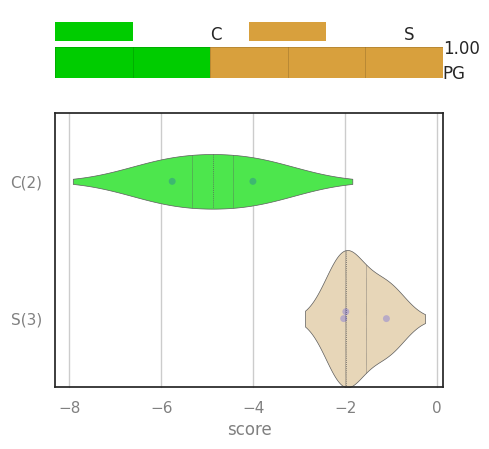

In [9]:
# import bone
reload(bone)
cfile = "/home/saptarshi.sinha/BoNE/plot/Hector_MSH.pdf"
pdf = getPDF(cfile)
ana = MacAnalysis()

#cfile = '13_14_3.txt'
#l1 = bone.getEntries(cfile, 0)
#wt1, l1 = [-0, 1], [l1[1:48], l1[50:]]

#wt1, l1 = [1], [bone.getEntries("test9.txt", 0)]



#cfile = 'iron_reg_sig.txt'
#wt1, l1 = [1], [['CCDC88A']]
#wt1, l1 = bone.getSViP()
#cfile = 'gprint_up_dn.txt'
#l1 = bone.getEntries(cfile, 0)
#wt1, l1 = [1, -1], [l1[1:4], l1[6:]]




#wt1, l1 = [1], [bone.getEntries("mamaprint.txt", 0)]

#wt1, l1 = [1], [['KI67', 'STK15', 'SURVIVIN', 'CCNB1', 'MYBL2', 'MMP11', 'CTSL2', 'GRB2', 'HER2', 'ER', 'PGR', 'BCL2', 'SCUBE2', 'CD68', 'BAG1', 'GSTM1', 'ACTB', 'GAPDH', 'RPLPO', 'GUS', 'TFRC']]
#OncotypeDX

#wt1, l1 = [1], [['ADGRL4','CCN4','CDKN2A','COL11A1','COL1A2','CXCL5','EDIL3','GREM1','HAPLN1','LINC01436','LUM','MMP1','MMP3','MYL9','NRN1','PDGFRA','PLS3','POSTN','PTN','ROR1','SPARC','TCEAL9','TMEFF2']]
#co-culture_sig2

#wt1, l1 = [1], [['HOXB13' ,'IL17BR' ,'BUB1B' ,'CENPA' ,'NEK2' ,'RACGAP1' ,'RRM2']]
#BCI

#wt1, l1 = [1], [bone.getEntries("PAM50.txt", 0)]

#wt1, l1 = [1], [bone.getEntries("veridex2.txt", 0)]

#wt1, l1 = [1], [bone.getEntries("7gene_sig.txt", 0)]
#7 gene/34604089

#wt1, l1 = [1], [bone.getEntries("brCA stem cells.txt", 0)]

#wt1, l1 = [1], [bone.getEntries("BrCA_stemcell_32.txt", 0)]

#wt1, l1 = [1], [['PSMB9', 'CXCL13', 'NPR3', 'CDKN2C']]
#Stemness [PMID:33110086]


#cfile = 'BREAST_CANCER_PROGENITOR_sig.txt'
#l1 = bone.getEntries(cfile, 0)
#wt1, l1 = [1, -1], [l1[1:432], l1[434:]]

#cfile = 'CNCL.txt'
#l1 = bone.getEntries(cfile, 0)
#wt1, l1 = [1, -1], [l1[1:7], l1[10:]]

#wt1, l1 = [1], [['AURKB', 'BUB1', 'CENPA', 'KIF4A', 'KIFC1', 'NCAPG', 'PLK1', 'RAD54L']]
#8 gene sig

#wt1, l1 = [1], [bone.getEntries("mSigDB.txt", 0)]

#wt1, l1 = [1], [bone.getEntries("Miranda.txt", 0)]

#PDL1#wt1, l1 = [1], [['CD4', 'CSK', 'PTPN6', 'CD274', 'CD3G', 'CD3D', 'HLA-DPA1', 'PTPN11', 'LCK', 'PDCD1', 'HLA-DRB3', 'HLA-DRB1', 'HLA-DQB2', 'HLA-DQA1', 'PDCD1LG2', 'HLA-DRB5', 'CD247', 'CD3E', 'HLA-DRA', 'HLA-DPA1', 'HLA-DQA2', 'HLA-DQA1', 'HLA-DRA', 'TRAV8-4', 'TRAV19', 'TRAV29DV5', 'HLA-DPB1', 'HLA-DQA2', 'HLA-DPB1', 'HLA-DPA1', 'HLA-DQB2', 'HLA-DQA2', 'HLA-DQB1', 'HLA-DQB2', 'HLA-DRA', 'HLA-DPB1', 'HLA-DRB4', 'HLA-DRA', 'HLA-DRB1', 'HLA-DPA1', 'HLA-DQB2', 'HLA-DQB2', 'HLA-DRA', 'HLA-DQB2', 'HLA-DPA1', 'HLA-DQB2', 'HLA-DRA', 'HLA-DPB1', 'HLA-DRB4', 'HLA-DQB1', 'HLA-DPA1', 'HLA-DQA2', 'HLA-DRB3', 'HLA-DQA2', 'HLA-DQA1', 'HLA-DQB2', 'HLA-DQA2', 'HLA-DQB1', 'HLA-DRA', 'HLA-DPA1', 'HLA-DPA1', 'HLA-DPB1', 'HLA-DQA2', 'HLA-DPB1', 'HLA-DQA2', 'TRBV12-3', 'PDCD1', 'HLA-DRA', 'TRBV7-9', 'TRBV12-3']]


#cfile = 'ALDEFLUOR.txt'
#l1 = bone.getEntries(cfile, 0)
#wt1, l1 = [1, -1], [l1[1:28], l1[30:]]


#cfile = 'TCGAnalyze.txt'
#l1 = bone.getEntries(cfile, 0)
#wt1, l1 = [1, -1], [l1[1:601], l1[605:]]

#wt1, l1 =[1], [['KDM5B', 'CTNNB1', 'NOTCH1', 'HIF1A', 'TWIST1', 'NES', 'EZH2', 'EPAS1', 'BMI1', 'LGR5']]
#cancer stem cell

#wt1, l1 =[1], [['ZSCAN4', 'CD44', 'CD34', 'ABCG2', 'PROM1', 'ZFPR42', 'NANOG']]
#normal stem cell

#wt1, l1 =[1], [['KLF4', 'MYC', 'SOX2', 'POU5F1']]
#Yamanaka factor

#wt1, l1 =[1], [['CD9', 'TREM2', 'IL17A', 'TGFB1', 'SPP1', 'GPNMB', 'FABP5', 'CD63']]

#wt1, l1 =[1], [['ZNF281']]

#wt1, l1 = [1], [bone.getEntries("late.txt", 0)]

#wt1, l1 =[1], [['RN7SL2', 'HMCN2', 'HBA2', 'DNAH9', 'HELLPAR', 'DUX4L26']]
#up_in_ctc_deg_CAMPO

#wt1, l1 =[3,-1], [['B2M','CD47','CD274', 'CD24','HLA-A'],['CALR']] #Dont eat me

#wt1, l1 =[1], [['B2M','CD47','CD274', 'CD24','HLA-A']] #Dont eat me


#wt1, l1 =[1], [['PVR', 'VEGFA', 'CD44', 'ADGRE5']] #platelets

#wt1, l1 =[1], [['PVR', 'TNFRSF10B', 'MAP1LC3B']] #NK CELL

#wt1, l1 = [1], [bone.getEntries("Luker_GJ.txt", 0)]

#cfile = 'CTC_CTCcl_DEG.txt'
#l1 = bone.getEntries(cfile, 0)
#wt1, l1 = [1, -1], [l1[1:41], l1[43:]]

#wt1, l1 = [1], [bone.getEntries("cell_cycle_asig.txt", 0)]

#wt1, l1 = [1], [bone.getEntries("biocarta.txt", 0)]

#wt1, l1 = [1], [bone.getEntries("936_EMT.txt", 0)]

#wt1, l1 = [1], [bone.getEntries("CAMPO_DEG_UP.txt", 0)]


#wt1, l1 = [1], [bone.getEntries("TIGHT_JUNCTION.txt", 0)]

#wt1, l1 = [1], [bone.getEntries("Maheswaran_SC_CL.txt", 0)]
#wt1, l1 = [1], [bone.getEntries("Maheswaran_sc_cl_short.txt", 0)]

#wt1, l1 = [1], [bone.getEntries("Veer_CTC_PMID22384245.txt", 0)]

#wt1, l1 = [1], [bone.getEntries("stromal_activation_PT_25060555.txt", 0)]

#wt1, l1 = [1], [bone.getEntries("128_EMP.txt", 0)]

#wt1, l1 = [1], [bone.getEntries("IBD123.txt", 0)]
#wt1, l1 = [1], [bone.getEntries("new123.txt", 0)]
#wt1, l1 = [1], [bone.getEntries("new456.txt", 0)]
#wt1, l1 = [1], [bone.getEntries("MFD.txt", 0)]
#wt1, l1 = [1], [bone.getEntries("TGFB_CD_up.txt", 0)]
#wt1, l1 = [1], [bone.getEntries("flagellin_down.txt", 0)]


#wt1, l1 = [1], [bone.getEntries("sm_age.txt", 0)]


#wt1, l1 =[1], [['COL1A1']] 

#wt1, l1 =[1], [['CDKN1A', 'PAI1', 'CTGF', 'ACTA2']]

#wt1, l1 = [1], [bone.getEntries("TGFB_CD_down.txt", 0)]

#cfile = 'IR_sig.txt'
#l1 = bone.getEntries(cfile, 0)
#wt1, l1 = [1, -0], [l1[1:19], l1[36:]]

#wt1, l1 = [1], [['ACTG1', 'MPP7', 'POF1B', 'MARVELD3', 'PDCD6IP', 'SRF', 'EPHB2', 'ECT2', 'ROCK2', 'PAK2', 'APC', 'TGFBR1', 'CLDN23', 'FZD5', 'STRN', 'AFDN', 'MYO1', 'CEPHA2', 'PLEC', 'CLDN2', 'PECAM1', 'ESAM', 'LSR', 'CLDN14', 'CLDN3']]

#wt1, l1 = [1], [['CLDN9', 'CLDN22', 'MICALL2', 'IKBKB', 'GPBAR1', 'OCEL1', 'NPHP4', 'TNF', 'CLDN11', 'MPDZ', 'WNT11', 'CLDN16', 'PRKCH', 'TBCD', 'CLDN10', 'RAB13', 'FRMPD2', 'BNP', 'HP1', 'ABCC8', 'ARL2', 'CDH5', 'RAMP2', 'CLDN34', 'FRMPD2', 'CLDN19', 'CLDN18', 'CLDN6']]


#wt1, l1 = [1], [bone.getEntries("Luker39.txt", 0)]

#wt1, l1 = [1], [['CCDC88A', 'ANXA1', 'PSMB9', 'CSF3', 'LGALS3BP', 'SP100', 'NT5E', 'RCN1', 'PSMB8', 'PARP9', 'OAS1', 'GPNMB', 'CAV1', 'PARP14', 'MAP1B', 'DDX58', 'IFIT5', 'UBE2L6', 'IFIH1', 'HELZ2', 'PTGS2', 'IFIT3', 'COL3A1', 'RND3', 'CXCL10', 'UCHL1', 'VEGFA', 'INA', 'TFPI2', 'MGLL', 'FSTL1', 'HMGA2']]
#32

#wt1, l1 = [1], [['PRNP', 'F2R', 'GPNMB', 'RCN1', 'COL3A1', 'CTSC', 'ANXA5', 'EGFR', 'GNB4', 'CAV1', 'SNX9', 'IGF2BP1', 'CNN3', 'MAP3K5', 'PNPLA3', 'ACTN2', 'RALA', 'CCDC88A', 'VEGFC']]
#19
###############################################
#cfile = 'log2_asig.txt'
#l1 = bone.getEntries(cfile, 0)
#wt1, l1 = [-3, 1], [l1[1:189], l1[190:]]

#wt1, l1 = [1], [bone.getEntries("Luker_test.txt", 0)]

#wt1, l1 = [1], [bone.getEntries("test1.txt", 0)]

#cfile = 'log5p01.txt'
#l1 = bone.getEntries(cfile, 0)
#wt1, l1 = [-3, 1], [l1[2:7], l1[9:]]

#wt1, l1 = [1], [['GPR35', 'GPR39', 'LPAR5', 'VIPR1', 'PTGDR', 'P2RY2', 'GPR176']]#AGONISTS
#wt1, l1 = [1], [['S1PR1', 'GPR4', 'F2R', 'CALCRL', 'FPR2', 'CCR5', 'CCR1', 'EDNRB', 'EDNRA', 'PTAFR', 'PTGFR', 'GPRC5C', 'GPRC5B']]#ANTAGONISTS




#wt1, l1 = [1], [bone.getEntries("NOD2_KEGG.txt", 0)]


#wt1, l1 = [1], [bone.getEntries("prodiff_test.txt", 0)]

#wt1, l1 = [1], [['AZGP1', 'BIRC5', 'DHCR7', 'IL6ST', 'MGP', 'RBBP8', 'STC2', 'UBE2C']]#endo predict

#wt1, l1 = [1], [['CTNNA1', 'JUP', 'CDH1', 'VIM', 'CDH2', 'ZEB2', 'GEMIN2', 'SNAI2', 'TCF3', 'TWIST1', 'FOXC2', 'FN1', 'SNAI1']]

#wt1, l1 = [1], [['CXCL9', 'CXL10', 'CXCL11', 'TAP1', 'PSMB9']]#TIS-5 gene signature

#wt1, l1 = [1], [['CXCL9', 'CD276', 'HLA-DQA1', 'CD274', 'IDO1', 'HLA-DRB1', 'HLA-E', 'CMKLR1', 'PDCD1LG2', 'PSMB10', 'LAG3', 'STAT1', 'CD8A', 'CCL5', 'NKG7', 'TIGIT', 'CD27', 'CXCR6']]#TIS-18 gene signature


#wt1, l1 = [1], [['CFH', 'GAS6', 'MME', 'OGN', 'POSTN', 'PDGFRB', 'DHRS3', 'MGP']]
#Dormancy-related genes

#wt1, l1 = [1], [['MCM3', 'CCNB1', 'MKI67', 'LMNB1']]
#proliferation genes#https://breast-cancer-research.biomedcentral.com/articles/10.1186/s13058-022-01503-5#:~:text=Dormant%20breast%20cancer%20cells%20exhibit,survival%20in%20breast%20cancer%20patients.

#wt1, l1 = [1], [['ACOT2', 'AFAP1-AS1', 'AGR2', 'AL845454.2', 'ALDH3A1', 'ASCL2', 'BMP2', 'CACNG4', 'CBR1', 'CST7', 'CXCL5', 'DDX3Y', 'FAM84A', 'FOXA2', 'FOXQ1', 'GPRIN2', 'GSTM3', 'IGFBP4', 'KIT', 'LEF1', 'LIPG', 'MUC13', 'MUC5AC', 'NNT', 'OLR1', 'PDZK1IP1', 'PKDCC', 'PRSS2', 'PSMB8', 'S100P', 'SCCPDH', 'SELENBP1', 'SH3RF3', 'SORBS2', 'TACSTD2', 'TFF1', 'TFF3', 'TIMP3', 'TLE4', 'TMEM45B', 'TMEM52B', 'TXNIP', 'UGT1A6']]
#DEG_S_R_PDO

#wt1, l1 = [1], [['PGR' ,'SCGB2A1' ,'PIP' ,'MGP' ,'EFHD1' ,'SERPINA3' ,'WFDC2' ,'AGR2' ,'MUC16' ,'TMPRSS4' ,'FAT1' ,'FAT2' ,'SFRP1' ,'SFRP2' ,'CXCL13' ,'CXCL14' ,'PRAME']]

#wt1, l1 = [1], [['CCR5' ,'CCR1' ,'EDNRB' ,'PTAFR' ,'PTGFR' ,'EDNRA' ,'S1PR1' ,'F2R' ,'CALCRL' ,'FPR2' ,'GPR4']]

#wt1, l1 = [1], [['GPR39' ,'GPR35' ,'LPAR5' ,'VIPR1' ,'PTGDR' ,'P2RY2']]

#wt1, l1 = [1], [['NOD1', 'TAB1', 'SUGT1', 'NLRP3', 'CHUK', 'MAPK14', 'NLRP1', 'CARD8', 'TAB2', 'TAB3', 'PYDC1', 'PYCARD', 'CXCL1', 'CXCL2', 'BIRC2', 'BIRC3', 'XIAP', 'HSP90AA1', 'HSP90AB1', 'IKBKB', 'IL1B', 'IL6', 'CXCL8', 'IL18', 'MEFV', 'NAIP', 'NFKB1', 'NFKBIA', 'NFKBIB', 'ERBIN', 'MAPK1', 'MAPK3', 'MAPK8', 'MAPK11', 'MAPK9', 'MAPK10', 'MAPK13', 'NLRC4', 'CARD18', 'RELA', 'MAPK12', 'CCL2', 'CCL5', 'CCL7', 'CCL8', 'CCL11', 'CCL13', 'NOD2', 'CARD9', 'MAP3K7', 'TNF', 'TNFAIP3', 'HSP90B1', 'TRAF6', 'TRIP6', 'CASP1', 'CASP5', 'CASP8', 'CARD6', 'IKBKG', 'RIPK2', 'PSTPIP1']]

#wt1, l1 = [1], [['REG4', 'CEACAM5', 'HOXB9', 'HOXA9', 'GPA33', 'HMGCS2', 'SPON1', 'KRT20', 'HOXB8', 'SCARNA22', 'FABP1', 'MUC12', 'PLA2G2A', 'PHGR1', 'CDH17', 'XIST', 'HOXB7', 'LINC02086', 'ANPEP', 'HOXA10', 'CEACAM7', 'MIR1307', 'NOX1', 'PAPSS2', 'PIGR', 'UGT1A10', 'HOXA10-AS', 'NT5E', 'HSD17B2', 'IL33', 'SPINK4', 'TMEM238L', 'MT1G', 'FFAR4', 'HOXA7', 'HOXB6', 'MMEL1', 'NEFL', 'SMIM24', 'ABCB1', 'CA1', 'PDZD3', 'TFF1', 'DHRS9', 'SNORA50C', 'PADI2', 'FABP6', 'REN', 'MUC5B', 'FAM3D', 'CDHR5', 'BTNL9', 'PARM1', 'ARHGDIG', 'AKR7A3', 'ENPP3', 'HOXB5', 'MUC2', 'ARSL', 'SLC51A', 'HOXA11-AS', 'GUCA2A', 'CA2', 'OLFM4', 'TMEM171', 'KRT8P3', 'NOSTRIN', 'SATB2', 'SERPINE2', 'AOAH', 'SOD3', 'DPP4', 'BTNL8', 'PRSS2', 'CELF2', 'SERPINB5', 'FBP1', 'SLC26A3', 'PRSS1', 'RARRES1', 'POU5F1', 'CA4']]
#23 OUTOF 158

#wt1, l1 =[1], [['IFIH1']]

#wt1, l1 = [1], [bone.getEntries("OLD_DEG.txt", 0)]

#wt1, l1 = [1], [bone.getEntries("Luker14.txt", 0)]

#wt1, l1 = [1], [bone.getEntries("Luker39.txt", 0)]

#wt1, l1 = [1], [bone.getEntries("KEGG_TJ.txt", 0)]

#wt1, l1 = [1], [bone.getEntries("14_3_mac.txt", 0)]

#cfile = 'Age_DEG.txt'
#l1 = bone.getEntries(cfile, 0)
#wt1, l1 = [0, 1], [l1[1:81], l1[85:]]


#cfile = 'PMID22530051_short.txt'
#l1 = bone.getEntries(cfile, 0)
#wt1, l1 = [-2, 1], [l1[1:6], l1[8:]]

#cfile = 'CD_mac.txt'
#l1 = bone.getEntries(cfile, 0)
#wt1, l1 = [1, 1], [l1[1:16], l1[19:]]

#cfile = 'peters_cd2.txt'
#l1 = bone.getEntries(cfile, 0)
#wt1, l1 = [1, 1], [l1[1:16], l1[19:]]

#cfile = 'CD_UC.txt'
#l1 = bone.getEntries(cfile, 0)
#wt1, l1 = [1, 0], [l1[1:16], l1[20:]]

#cfile = 'peters_uc.txt'
#l1 = bone.getEntries(cfile, 0)
#wt1, l1 = [0, 1], [l1[1:25], l1[28:]]

#cfile = 'UC_mac.txt'
#l1 = bone.getEntries(cfile, 0)
#wt1, l1 = [1, -1], [l1[1:31], l1[34:]]

#cfile = '13_14_3.txt'
#l1 = bone.getEntries(cfile, 0)
#wt1, l1 = [-1,2], [l1[1:48], l1[50:]]

#cfile = 'PLAM.txt'
#l1 = bone.getEntries(cfile, 0)
#wt1, l1 = [1, -1], [l1[1:20], l1[22:]]

#cfile = 'test1.txt'
#l1 = bone.getEntries(cfile, 0)
#wt1, l1 = [-1, 1], [l1[1:14], l1[15:]]

#cfile = 'MCF7_LG.txt'
#l1 = bone.getEntries(cfile, 0)
#wt1, l1 = [1, -1], [l1[3:8], l1[12:]]

#wt1, l1 =[1], [['ADAM17', 'AXIN1', 'AXIN2', 'CCND2', 'CSNK1E', 'CTNNB1', 'CUL1', 'DKK1', 'DKK4', 'DLL1', 'DVL2', 'FRAT1', 'FZD1', 'FZD8', 'GNAI1', 'HDAC11', 'HDAC2', 'HDAC5', 'HEY1', 'HEY2', 'JAG1', 'JAG2', 'KAT2A', 'LEF1', 'MAML1', 'MYC', 'NCOR2', 'NCSTN', 'NKD1', 'NOTCH1', 'NOTCH4', 'NUMB', 'PPARD', 'PSEN2', 'PTCH1', 'RBPJ', 'SKP2', 'TCF7', 'TP53', 'WNT1', 'WNT5B', 'WNT6' ]]

#wt1, l1=[1],[['Lsr', 'Tmem98', 'Nectin2', 'Lgals9', 'Cenpv', 'Sumo3', 'Spint2', 'Chmp4b', 'Ocln', 'Cmbl']]

#wt1, l1=[1],[['DDIT4', 'GZMB', 'CAMKK1', 'GHRL', 'CLEC10A', 'DTYMK', 'PER1', 'PDK1', 'NPEPL1', 'EPHX2', 'GPCPD1', 'MS4A3', 'GNG2', 'MUM1', 'IL13RA1', 'IL1B', 'STIP1', 'ID3', 'DHRS13', 'CHSY1', 'MEGF6', 'NR1D1', 'AK5', 'TCN1', 'ZNF438', 'CYB561', 'NSUN3', 'NR1D2', 'SLPI', 'POLH', 'CD38', 'PARP2', 'SYT11', 'TIAM2', 'PGPEP1', 'SH2D1B', 'CD1C', 'C12orf75', 'REM2', 'LLGL2', 'FKBP4']]#41 time

#wt1, l1=[1],[['CYR61', 'UCHL1', 'FOS', 'FOS B', 'EGR1', 'VIP', 'KRT24']]

#wt1, l1=[1],[['PTPN18']]

#wt1, l1 =[1,-1], [['CXCL1', 'CCL2', 'IRAK2'],['MAPK3', 'MAVS', 'PALD1', 'FLI1']] 

#cfile = 'chen2017_control.txt'
#l1 = bone.getEntries(cfile, 0)
#wt1, l1 = [1, -1], [l1[1:113], l1[115:]]

#cfile = 'chen2017_CD.txt'
#l1 = bone.getEntries(cfile, 0)
#wt1, l1 = [1, -1], [l1[1:395], l1[400:]]


#cfile = 'chen2017_snp13.txt'
#l1 = bone.getEntries(cfile, 0)
#wt1, l1 = [3, -1], [l1[1:4], l1[5:]]

#cfile = 'chen2017_Cmdp_CDmdp.txt'
#l1 = bone.getEntries(cfile, 0)
#wt1, l1 = [1, -1], [l1[1:3], l1[4:]]

#wt1, l1 = [1], [bone.getEntries("prodiff_test.txt", 0)]

#cfile = 'siglec.txt'
#l1 = bone.getEntries(cfile, 0)
#wt1, l1 = [1, -0], [l1[1:30], l1[32:]]
#PPARGC1A


#cfile = 'ipf/IPF signature_PMID_28942086.txt'
#l1 = bone.getEntries(cfile, 0)
#wt1, l1 = [1, -1], [l1[1:8], l1[10:]]

#file = 'ipf/nejm COVID VS H1N1 LUNG_PMID 32437596.txt'
#l1 = bone.getEntries(cfile, 0)
#wt1, l1 = [1, -1], [l1[3:62], l1[65:]]


#wt1, l1 = [1], [bone.getEntries("test27.txt", 0)]


#wt1, l1 = [1], [['ACADL', 'ISYNA1', 'SUMO3', 'CLDN12', 'PCCB', 'GFUS', 'CENPV', 'CHCHD3', 'NDUFAB1', 'VDAC3']]

#wt1, l1 =[1], [['MSH5']]




#wt1, l1 = [1], [['IL1B','IL6ST', 'IL8','NFKBIE']]

wt1, l1 = [1], [['MSH2', 'MSH5', 'MSH6', 'PCNA', 'RFC2', 'RFC3', 'RFC4', 'RFC5', 'RPA3']]

#ana.getPekow()
#ana.getKanth2016_2()
#ana.getReumersCombined2()
#ana.getGao()
#ana.getFessler2016()
#ana.get_Feraccin_2007()
#ana.get_Marisa_2013()
#ana.get_Kirzin_2014()
#ana.get_TCGA_2017_2()
ana.getAV1()
#ana.getAV2()
#ana.getAV_caco()
#ana.getParedesCRC4()

###############
fig = processData(ana, l1, wt1, desc=None, violin=1)
pdf.savefig(transparent=True,bbox_inches = 'tight')
closePDF(pdf)
###################
ana.orderData(l1, wt1)
ROC=ana.getROCAUC()
lval, score = ana.getScores()
t, p = ttest_ind(lval[0],lval[1], equal_var= True)
p

In [16]:
ana.getGSE196006()


KeyError: 'SS71'

In [5]:
from statistics import mean 
import bone
reload(bone)
ana = MacAnalysis()
#ana.getHaberSCUMI()
#ana.getHBC2011()
ana.getSaterstad2()
#A1=['ANG4', 'CYP2C65', 'RTN4R', 'HSD17B13', 'PLA2G4C', 'RASGRF2', 'COL15A1', 'ACKR4', 'SLC8A1', 'SSBP2', 'LPL', 'ITLN1', 'POU2F3', 'ARHGAP20', 'RNF150', 'NACAD', 'PNLIPRP2', 'RIMKLA', 'GM2115', 'RGS13', 'CYP2C55', 'VNN1', 'CYRIA', 'ALOX5', 'BMP1', 'GVIN-PS5', 'TRIB2', 'TGTP2', 'KCNH3', 'SH2D7', 'SEMA7A', 'NREP', 'SPTA1', 'TRPM5', 'CCDC9B', 'BMX', 'PTGS1', 'CPN1', 'SV2C', 'LY6M', 'RIAN', 'GM4951', 'HCK', 'TM4SF1', 'RGS17', 'CLCA1', 'PTPN14', 'ALOX5AP', 'CES1G', 'GM8714', 'DIXDC1', 'SH2D6', 'CKB', 'NTN4', 'PIK3R5', 'DCLK1', 'BMP3', 'GUCA2A', 'TMEM181C-PS', 'OLFR56', 'PRSS23', 'TSPAN6', 'RASSF4', 'MATK', 'CLEC2E', 'NRP2', 'VSIG2', 'PLSCR2', 'CCL9', 'OTC', 'IDO1', 'AVIL', 'HSD3B3', 'CACNA1E', 'FILIP1L', 'RSAD2', 'ARL14', 'HSD3B2', 'PCSK1', 'AQP1', 'GOLM2', 'PSTPIP2', 'ARHGAP24', 'LYPD8L', 'TGTP1', 'SLCO2B1', 'CMAH', 'BOC', 'PRMT5', 'CLCA4A', 'AGT', 'UBD', 'PDLIM2', 'COL8A1', 'GBP3', 'SPRR1A', 'TENM4', 'ANKRD40CL', 'ECI3', 'DNAAF9', 'CAR1', 'FAM189A2', 'MFAP3L', 'RBP4', 'CLPS', '2610035D17RIK', 'SSTR1', 'AUTS2', 'SLC1A4', 'MX1', 'MUC3A', 'ETV5', 'FFAR2', 'CCN3', 'MPTX1', 'KCTD12', 'GBP2', 'FER1L6', 'GUCA2B', 'ELAPOR1', 'A4GNT', 'ANK', 'ANG', 'PIK3CG', 'STRA6L', 'SLC2A10', 'HOMER2', 'SNX7', 'RNASE4', 'CHP2', 'CES1D', 'PPARA', 'GCNT3', 'ALDH1A7', 'SPDEF', 'ST3GAL3', 'H2-DMA', 'AADAC', 'CIITA', 'TPSG1', 'SLC25A4', 'BACE2', 'IGDCC4', 'CAPN9', 'IRGM1', 'ADTRP', 'TRIM15', 'GM1123', 'SLC22A1', 'EPHA2', 'PNP2', 'AHCYL2', 'TLE1']
#A1=['CD8B1', 'RIMS2', 'SLC5A7', '2310079G19RIK', 'TRERF1', 'PALM', 'SYT8', 'HSPB1', 'MT-ATP8', 'HOXD11', 'MAPK15', 'CXCL5', 'CLCA4B', 'KRT36', 'CXCL1', 'RBM24', 'CD69', 'TAC1', 'GADD45B', 'ABLIM2', 'HHEX', 'H1F3', 'GRHL3', 'GDF15', 'HOXD10', 'GM42047', 'MBOAT2', 'SLPI', 'BMP2', 'HSPA1B', 'PCDH17', 'HSPA1A', 'SLC16A3', 'CPN2', 'APOBEC2', 'LBP', 'ADM', 'PEAR1', 'ADAMTSL5', 'TTC39AOS1', 'DDIT4', 'SOCS3', 'CFH', 'GM43305', 'SPSB1', 'ABCG8', 'CEBPD', 'GM37352', 'GM49759', 'SCAND1', 'ST8SIA5', 'RAB31', 'H4C9', 'ARC', 'KLF2', '2010016I18RIK', 'PMAIP1', 'CYP2D12', 'ATP12A', 'ADAMTSL4', 'IKZF2', 'ADGRF1', 'CLMP', 'PLA2G4F', 'CITED2', 'CYP2D13', 'GM45397', 'GK', 'GM9926', 'FAM124A', 'RDX', 'CES2F', 'MARCKSL1', 'MT-ATP6', 'SLC28A3', 'GM10925', 'SLC36A1', 'TRF', 'GADD45G']
A1=['PRMT1', 'PRMT2', 'PRMT3', 'PRMT5', 'PRMT6', 'PRMT7', 'PRMT9', 'PRMT8', 'PRMT4']

for a in A1:
    print ("-----------------")
    #print (a)
    wt1, l1 = [1], [[a]]
    ana.orderData(l1,wt1)
    ana.f_ranks
    X=[]
    for k in range(3):
        X.append(mean(ana.getScores()[0][k]))
        #print (mean(ana.getScores()[0][k]))
    print  (a, X)
        
print ("********************************************")  
print ("********************************************")        

#B1=['S1PR1', 'GPR4', 'F2R', 'CALCRL', 'FPR2', 'CCR5', 'CCR1', 'EDNRB', 'EDNRA', 'PTAFR', 'PTGFR', 'GPRC5C', 'GPRC5B']
#B1=['EDG1', 'GPR4', 'F2R', 'CALCRL', 'FPRL1', 'CCR5', 'CCR1', 'EDNRB', 'EDNRA', 'PTAFR', 'PTGFR', 'GPRC5C', 'GPRC5B']

#for b in B1:
#    print ("-----------------")
#    print (b)    
#    wt1, l1 = [1], [[b]]
#    ana.orderData(l1,wt1)
#    ana.f_ranks
#    for k in range(5):
#        print (np.mean(ana.getScores()[0][k]))

Sæterstad 2022 IBD (n = 29)
GSE179128 http://hegemon.ucsd.edu/Tools/explore.php?key=blood:leukemia&id=IBD56
29 6 12 11 IBD56
-----------------
[1]
PRMT1 [-0.4403280952119969, -0.23346798746318653, -0.6420297982669224]
-----------------
[1]
PRMT2 [-1.0980725840606067, -1.1794072067353583, -0.9265469290438094]
-----------------
[1]
PRMT3 [-0.2221994915144087, -0.5985556720177792, -0.5849230814481491]
-----------------
[1]
PRMT5 [-0.3240174137624607, -0.20791611082776654, -0.5308849889201019]
-----------------
[1]
PRMT6 [-0.18514971209323955, -0.42724285158395336, -0.46433577679904525]
-----------------
[1]
PRMT7 [-0.10346988555318537, -0.6567034327618478, -0.37068842196284235]
-----------------
[1]
PRMT9 [-0.16977796446408444, -0.47785893986212963, -0.43308312768345597]
-----------------
[0]
PRMT8 [0, 0, 0]
-----------------
[0]
PRMT4 [0, 0, 0]
********************************************
********************************************


In [6]:
from statistics import mean 
import bone
reload(bone)
ana = MacAnalysis()
#ana.getHaberSCUMI()
ana.getSaterstad()

wt1, l1 = [1], [['RAIG2']]
#wt1, l1 = [1], [[a]]
ana.orderData(l1,wt1)
mean(ana.getScores()[0][1])

Sæterstad 2022 IBD (n = 29)
GSE179128 http://hegemon.ucsd.edu/Tools/explore.php?key=blood:leukemia&id=IBD56
29 6 5 5 IBD56
[0]


0

Sæterstad 2022 IBD (n = 29)
GSE179128 http://hegemon.ucsd.edu/Tools/explore.php?key=blood:leukemia&id=IBD56
29 6 12 11 IBD56
[1]


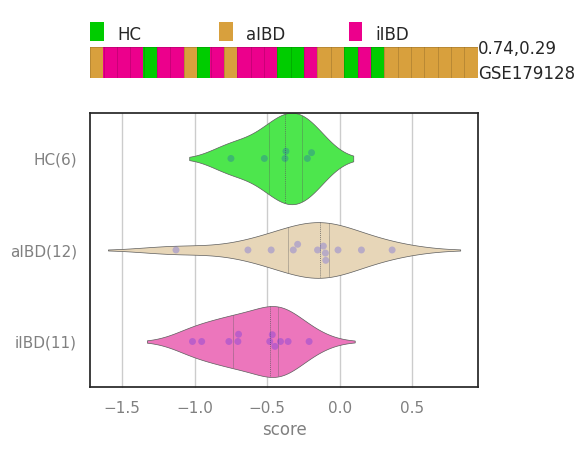

In [21]:
# import bone
reload(bone)
cfile = "/Users/sinha7290/public_html/BoNE/6gene_Com_3group.pdf"
pdf = getPDF(cfile)
ana = MacAnalysis()


wt1, l1 = [1], [['PRMT5']]



ana.getSaterstad2()
#ana.getQu2016()
#ana.getPLP62()

###############
fig = processData(ana, l1, wt1, desc=None, violin=1)
pdf.savefig(transparent=True,bbox_inches = 'tight')
closePDF(pdf)


In [14]:
ana.getKang2022()


Kung2022 (n = 12)
GSE164742 http://hegemon.ucsd.edu/Tools/explore.php?key=blood:leukemia&id=TNB74
0 0 0 0 TNB74


In [5]:
ana.getBentires()

Bentires2019 (n = 41)
GSE124817 http://hegemon.ucsd.edu/Tools/explore.php?key=blood:leukemia&id=TNB66
0 0 0 0 TNB66


In [15]:
ana.orderData(l1,wt1)
ana.f_ranks
ana.getScores()

[1]


IndexError: arrays used as indices must be of integer (or boolean) type

In [12]:
reload(bone)

ana = MacAnalysis()

ana.getAmado1()
#ana.getYANG2()

#wt1, l1 = [1], [bone.getEntries("PBMC.txt", 0)]
#wt1, l1 = [1], [['IFIH1']]
wt1, l1 = bone.getSViP()
#wt1, l1 = [1], [['ISG15', 'IFI6', 'MX1', 'RSAD2', 'MX2', 'OAS1', 'IRF9', 'IFITM1', 'OAS3', 'IFI35','GBP1', 'GBP2', 'PSMB8']]#Type12PMID: 31434690


#cfile = 's12_4.txt'
#l1 = bone.getEntries(cfile, 0)
#wt1, l1 = [1, -3], [l1[1:23], l1[25:]]

#cfile = 'IFN_sig.txt'
#l1 = bone.getEntries(cfile, 0)
#wt1, l1 = [0, 1], [l1[1:16], l1[18:]]

#cfile = 'ipf/IPF signature_PMID_28942086.txt'#blood
#l1 = bone.getEntries(cfile, 0)
#wt1, l1 = [1, -1], [l1[1:8], l1[10:]]


ana.order = [i for i in ana.h.aRange()]
df = pd.DataFrame()
ana.orderData(l1, wt1)
df['MMP'] = [None, None] + list(ana.f_ranks)
df
thr = hu.getThrData(ana.f_ranks)
fthr = thr[0]
#fthr = 8.703688988121614
g1 = [i for i in ana.order if ana.f_ranks[i - ana.h.start] < fthr]
g2 = [i for i in ana.order if ana.f_ranks[i - ana.h.start] >= fthr]
for i in ana.order:
    if i in g1:
        print (ana.h.headers[i],'\t', ana.f_ranks[i - ana.h.start],'\t', '0')
    else:
        print (ana.h.headers[i],'\t', ana.f_ranks[i - ana.h.start],'\t', '1')
fthr
#df['MMP']

Amado1 (n = 42)
GSE168400 http://hegemon.ucsd.edu/Tools/explore.php?key=blood:leukemia&id=SS66
42 11 19 12 SS66
[19]
GSM5137947 	 -6.516738246605882 	 0
GSM5137948 	 -9.651312394558524 	 0
GSM5137949 	 -4.821131487475962 	 1
GSM5137950 	 -3.95590092288483 	 1
GSM5137951 	 -6.62295633367973 	 0
GSM5137952 	 -9.240242138146249 	 0
GSM5137953 	 -5.094190736644553 	 1
GSM5137954 	 -1.485206828389632 	 1
GSM5137955 	 -6.357063358667414 	 0
GSM5137956 	 -3.9786209259769447 	 1
GSM5137957 	 -3.4865108741068105 	 1
GSM5137958 	 -7.97389604910026 	 0
GSM5137959 	 -9.97814637728397 	 0
GSM5137960 	 -7.795195222543271 	 0
GSM5137961 	 -1.1280330229319395 	 1
GSM5137962 	 -5.82399177182913 	 1
GSM5137963 	 -3.8392803426576143 	 1
GSM5137964 	 -7.027041560223162 	 0
GSM5137965 	 -5.166778911708209 	 1
GSM5137966 	 -6.314594711756071 	 0
GSM5137967 	 -5.115943780874317 	 1
GSM5137968 	 -3.817080139756022 	 1
GSM5137969 	 -6.761801926506756 	 0
GSM5137970 	 -8.962142075548082 	 0
GSM5137971 	 -6.1545

-6.215635922180294

TAM2 (n = 14)
PG http://hegemon.ucsd.edu/Tools/explore.php?key=blood:leukemia&id=PGSS7
8 4 4 0 PGSS7
[1]


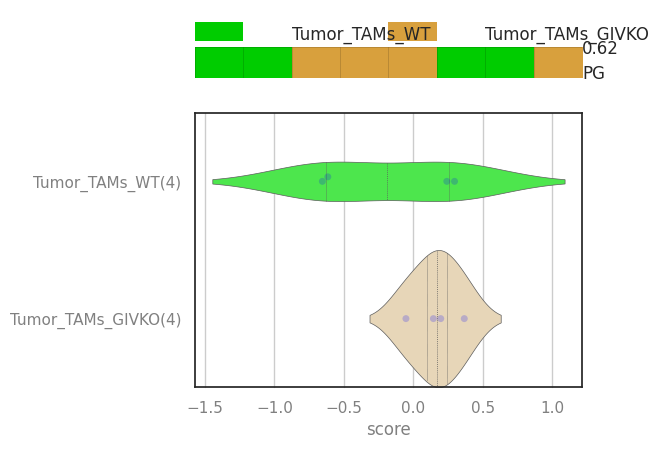

In [43]:
import bone
reload(bone)
cfile = "/Users/sinha7290/public_html/BoNE/test.pdf"
pdf = getPDF(cfile)
ana = MacAnalysis()


#wt1, l1 = [1], [bone.getEntries("Miranda.txt", 0)]

#wt1, l1 = [1], [['IFNG', 'STAT1', 'CCR5', 'CXCL9', 'CXCL10', 'CXCL11', 'IDO1PRF1', 'GZMA', 'HLA-DRA']]
#INF_g

#wt1, l1 = [1], [['CCDC88A']]

#wt1, l1 = [1], [['4930404H11Rik', 'Amd-ps4', 'Gm12191', 'Gm16378', 'Gm5537', 'Gm8276', 'Pgk1-rs7', 'Rbpj-ps3', 'Rpl30-ps10']]
#NASH2022_CDAA_UP_WT

#wt1, l1 = [1], [['Cbx3-ps8', 'DXBay18', 'Elfn2', 'Ighj1', 'Ighv1-15', 'Ighv1-54', 'Ighv3-8', 'Igkv15-103', 'Igkv3-4', 'Mmp7', 'Phyhip', 'Ptprt', 'Rps13-ps2']]
#NASH2022_CDAA_Dn_WT

#wt1, l1 = [1], [['3110070M22Rik', '6030443J06Rik', 'AC154457.3', 'Adam32', 'Atp6v0a4', 'BC050972', 'Cc2d2b', 'Ccl8', 'Cd209f', 'Cdh15', 'Chrna4', 'Clic3', 'Cyp2b13', 'Cyp2b9', 'E130018N17Rik', 'Gm12602', 'Gm15592', 'Gm26821', 'Gm34474', 'Gm34654', 'Gm42047', 'Gm43743', 'Gm44478', 'Gm47357', 'Gm47761', 'Gm48386', 'Gm6682', 'Gm7589', 'Gvin1', 'Gzmk', 'Hamp2', 'Ighv2-9', 'Mettl7a2', 'Ovol2', 'Pdcd1', 'Peg10', 'Pgam1-ps2', 'Ptprn2', 'Slc28a1', 'Trim12a', 'Trim5', 'Zfp708']]
#NASH2022_CSAA_UP_WT

#wt1, l1 = [1], [['3110070M22Rik', '6030443J06Rik', 'AC154457.3', 'Adam32', 'Atp6v0a4', 'BC050972', 'Cc2d2b', 'Ccl8', 'Cd209f', 'Cdh15', 'Chrna4', 'Clic3', 'Cyp2b13', 'Cyp2b9', 'E130018N17Rik', 'Gm12602', 'Gm15592', 'Gm26821', 'Gm34474', 'Gm34654', 'Gm42047', 'Gm43743', 'Gm44478', 'Gm47357', 'Gm47761', 'Gm48386', 'Gm6682', 'Gm7589', 'Gvin1', 'Gzmk', 'Hamp2', 'Ighv2-9', 'Mettl7a2', 'Ovol2', 'Pdcd1', 'Peg10', 'Pgam1-ps2', 'Ptprn2', 'Slc28a1', 'Trim12a', 'Trim5', 'Zfp708']]
#NASH2022_CSAA_UP_WT

#wt1, l1 = [1], [['CXCL9', 'CXL10', 'CXCL11', 'TAP1', 'PSMB9']]
#TIS_5

#wt1, l1 = [1], [['CD206', 'CMKLR1', 'CD274', 'IDO1', 'CXCL9', 'CXCR6', 'CD27', 'TIGIT', 'NKG7', 'CCL5', 'CD8A', 'STAT1', 'LAG3', 'PSMB10', 'PCCD1LG2', 'HLA-E', 'HLA-DRB1', 'HLA-DQA1']]
#TIS_18

#wt1, l1 = [1], [['FAP', 'PDGFRB', 'CD163', 'SIGLEC1', 'IL10', 'CCL2', 'CCL8', 'CCL13', 'INHBA', 'VCAN', 'AXL', 'TWIST2', 'ADAM12', 'COL6A3', 'STC1', 'ISG15', 'BCAT1', 'OLFML2B']]
#IMS

#cfile = 'new_SASP1_31251810.txt'
#l1 = bone.getEntries(cfile, 0)
#wt1, l1 = [1, -1], [l1[1:12], l1[13:]]

#wt1, l1 = [1], [bone.getEntries("new_SASP2.txt", 0)]


#ana.getISPY1_248()
#ana.getMenachery2017(7)
#ana.getPGTAMS()
#ana.getCagnin2012()
#ana.getPGNASH2022()
#ana.gethelanew()
#ana.getTAM2()
#ana.getLCC2()
fig = processData(ana, l1, wt1, desc=None, violin=1)
pdf.savefig(transparent=True,bbox_inches = 'tight')
closePDF(pdf)

In [6]:
ana.order = [i for i in ana.h.aRange()]
df = pd.DataFrame()
ana.orderData(l1, wt1)
df['MMP'] = [None, None] + list(ana.f_ranks)
df
thr = hu.getThrData(ana.f_ranks)
fthr = thr[0]
#fthr = 8.703688988121614
g1 = [i for i in ana.order if ana.f_ranks[i - ana.h.start] < fthr]
g2 = [i for i in ana.order if ana.f_ranks[i - ana.h.start] >= fthr]
for i in ana.order:
    if i in g1:
        print (ana.h.headers[i], ana.f_ranks[i - ana.h.start], '0')
    else:
        print (ana.h.headers[i], ana.f_ranks[i - ana.h.start], '1')
fthr
df['MMP']

[10, 14]
GSM4411710 4.311284503041176 1
GSM4411722 5.419000495448406 1
GSM4411715 5.47144118545604 1
GSM4411725 3.8880021672441236 1
GSM4411711 -0.3917663638743969 0
GSM4411701 5.482456216111058 1
GSM4411724 3.2763129955725376 1
GSM4411712 6.001919795280308 1
GSM4411704 7.680878353790057 1
GSM4411703 1.001601774960739 0
GSM4411708 4.763977091286858 1
GSM4411717 4.916452384894311 1
GSM4411705 -2.0379514360740707 0
GSM4411720 3.6645862684447055 1
GSM4411716 5.890134406627459 1
GSM4411709 1.9485674158278297 0
GSM4411719 4.5336287899670165 1
GSM4411723 6.359397777135879 1
GSM4411726 5.813646917448168 1
GSM4411718 5.226904855881175 1
GSM4411707 0.8858273004038306 0
GSM4411728 6.094732755272215 1
GSM4411702 7.02583166301188 1
GSM4411727 4.900468458655906 1
GSM4411706 0.161997734519991 0
GSM4411721 4.808322223328263 1
GSM4411713 -0.06445083386721429 0
GSM4411714 -5.044006709921063 0


0          NaN
1          NaN
2     4.311285
3     5.419000
4     5.471441
5     3.888002
6    -0.391766
7     5.482456
8     3.276313
9     6.001920
10    7.680878
11    1.001602
12    4.763977
13    4.916452
14   -2.037951
15    3.664586
16    5.890134
17    1.948567
18    4.533629
19    6.359398
20    5.813647
21    5.226905
22    0.885827
23    6.094733
24    7.025832
25    4.900468
26    0.161998
27    4.808322
28   -0.064451
29   -5.044007
Name: MMP, dtype: float64

In [11]:
ana.getbos()

Bos 2009 Breast Cancer (n = 572)
GSE2034 GSE2603 GSE12276 http://hegemon.ucsd.edu/Tools/explore.php?key=blood:leukemia&id=BC20
0 0 0 0 BC20


Lang 2018 (n = 34)
GSE111842 http://hegemon.ucsd.edu/Tools/explore.php?key=blood:leukemia&id=TNB21
22 6 16 0 TNB21
[0, 15]


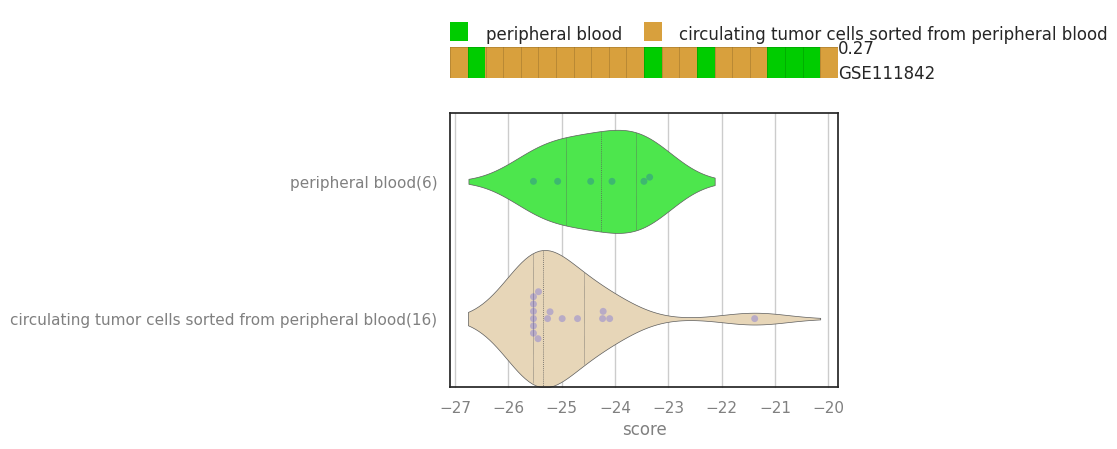

In [6]:
import bone
reload(bone)
cfile = "/Users/sinha7290/public_html/BoNE/gprint_final/test.pdf"
pdf = getPDF(cfile)
ana = MacAnalysis()
#cfile = 'iron_reg_sig.txt'
#wt1, l1 = [1], [['CCDC88A']]
#wt1, l1 = bone.getSViP()
#cfile = 'gprint_up_dn.txt'
#l1 = bone.getEntries(cfile, 0)
#wt1, l1 = [1, -1], [l1[1:4], l1[6:]]

#wt1, l1 = [1], [bone.getEntries("mamaprint.txt", 0)]

#wt1, l1 = [1], [['KI67', 'STK15', 'SURVIVIN', 'CCNB1', 'MYBL2', 'MMP11', 'CTSL2', 'GRB2', 'HER2', 'ER', 'PGR', 'BCL2', 'SCUBE2', 'CD68', 'BAG1', 'GSTM1', 'ACTB', 'GAPDH', 'RPLPO', 'GUS', 'TFRC']]
#OncotypeDX

#wt1, l1 = [1], [['ADGRL4','CCN4','CDKN2A','COL11A1','COL1A2','CXCL5','EDIL3','GREM1','HAPLN1','LINC01436','LUM','MMP1','MMP3','MYL9','NRN1','PDGFRA','PLS3','POSTN','PTN','ROR1','SPARC','TCEAL9','TMEFF2']]
#co-culture_sig2

#wt1, l1 = [1], [['HOXB13' ,'IL17BR' ,'BUB1B' ,'CENPA' ,'NEK2' ,'RACGAP1' ,'RRM2']]
#BCI

#wt1, l1 = [1], [bone.getEntries("PAM50.txt", 0)]

#wt1, l1 = [1], [bone.getEntries("veridex2.txt", 0)]

#wt1, l1 = [1], [bone.getEntries("7gene_sig.txt", 0)]
#7 gene/34604089

#wt1, l1 = [1], [bone.getEntries("brCA stem cells.txt", 0)]

#wt1, l1 = [1], [bone.getEntries("BrCA_stemcell_32.txt", 0)]

#wt1, l1 = [1], [['PSMB9', 'CXCL13', 'NPR3', 'CDKN2C']]
#Stemness [PMID:33110086]


#cfile = 'BREAST_CANCER_PROGENITOR_sig.txt'
#l1 = bone.getEntries(cfile, 0)
#wt1, l1 = [1, -1], [l1[1:432], l1[434:]]

#cfile = 'CNCL.txt'
#l1 = bone.getEntries(cfile, 0)
#wt1, l1 = [1, -1], [l1[1:7], l1[10:]]

#wt1, l1 = [1], [['AURKB', 'BUB1', 'CENPA', 'KIF4A', 'KIFC1', 'NCAPG', 'PLK1', 'RAD54L']]
#8 gene sig

#wt1, l1 = [1], [bone.getEntries("mSigDB.txt", 0)]

#wt1, l1 = [1], [bone.getEntries("Miranda.txt", 0)]

#wt1, l1 = [1], [['ALDH1A2']]


#cfile = 'ALDEFLUOR.txt'
#l1 = bone.getEntries(cfile, 0)
#wt1, l1 = [1, -1], [l1[1:28], l1[30:]]


#cfile = 'TCGAnalyze.txt'
#l1 = bone.getEntries(cfile, 0)
#wt1, l1 = [1, -1], [l1[1:601], l1[605:]]

#wt1, l1 =[1], [['KDM5B', 'CTNNB1', 'NOTCH1', 'HIF1A', 'TWIST1', 'NES', 'EZH2', 'EPAS1', 'BMI1', 'LGR5']]
#cancer stem cell

#wt1, l1 =[1], [['ZSCAN4', 'CD44', 'CD34', 'ABCG2', 'PROM1', 'ZFPR42', 'NANOG']]
#normal stem cell

#wt1, l1 =[1], [['KLF4', 'MYC', 'SOX2', 'POU5F1']]
#Yamanaka factor

#wt1, l1 =[1], [['CCDC88A']]

###############################################
#cfile = 'log4p01.txt'
#l1 = bone.getEntries(cfile, 0)
#wt1, l1 = [1, -1], [l1[1:13], l1[14:]]

#wt1, l1 = [1], [['FBP1', 'EGF']]

#wt1, l1 = [1], [bone.getEntries("new_asig.txt", 0)]

cfile = 'log5p01.txt'
l1 = bone.getEntries(cfile, 0)
wt1, l1 = [-3, 1], [l1[2:7], l1[9:]]

#cfile = 'log3p01.txt'
#l1 = bone.getEntries(cfile, 0)
#wt1, l1 = [1, -1], [l1[1:48], l1[49:]]


#wt1, l1 = [1], [bone.getEntries("early.txt", 0)]

#wt1, l1 = [1], [['FBP1','FXYD3', 'SLC12A3']]


#wt1, l1 = [1], [['CCDC88A']]
#wt1, l1 = [1], [['PGR' ,'SCGB2A1' ,'PIP' ,'MGP' ,'EFHD1' ,'SERPINA3' ,'WFDC2' ,'AGR2' ,'MUC16' ,'TMPRSS4' ,'FAT1' ,'FAT2' ,'SFRP1' ,'SFRP2' ,'CXCL13' ,'CXCL14' ,'PRAME']]
#ana.getBos()
#ana.getPGhshm()
#ana.getPGhsall()
#ana.getPGhs0()
#ana.getPGhsKO()
#ana.getPGhsWT()
#ana.gethela()
#ana.getPGTAMS()
#ana.getcelltype()#drug
#ana.getArpaia()
ana.getlang2018()
#ana.getCreighton2009()
#ana.getshan2019()
#ana.getwang2()
#ana.getebright2020()
#ana.getSavage2020(2)
#ana.getaceto2013()
#ana.getboral2()############BMRC
#ana.getboral3()############CTC
#ana.getebright3()
#ana.getAnderson2021()
#ana.getFu2019()
#ana.getXiao2020()
#ana.getXiao2()
#ana.getCarey2010()#claudin_low##############
#ana.getHatzis2()####################
#ana.getTsai2()
#ana.getCarey2()
#ana.getISPY1()
#ana.getISPY1_310()
#ana.getFrancesc2()
#ana.getfina(0)
#ana.getsabatier()
#ana.getpawitan2()
#ana.getguedj()
#ana.getdedeurwaerder()##########
#ana.getSircoulomb()
#ana.getdeRonde()
#ana.getAzim()##################
#ana.getjonsson2012()
#ana.getxavier()############
#ana.getxavier2()
#ana.getcampo2022()
#ana.getshen2022()
#ana.getsun2()
#ana.gettang2022()
#ana.getSoltysova2()
#ana.getScaltriti2021()
#ana.getbardia1()
#ana.getbardia12()
#ana.getkeene2()
#ana.getfina()
#ana.getSoltysova()
#ana.getMolloy()
#ana.getFrancesc2022()
#ana.getcampo2022()
#ana.getCagnin2012()

fig = processData(ana, l1, wt1, desc=None, violin=1)
pdf.savefig(transparent=True,bbox_inches = 'tight')
closePDF(pdf)

In [6]:

ana.order = [i for i in ana.h.aRange()]
df = pd.DataFrame()
ana.orderData(l1, wt1)
df['MMP'] = [None, None] + list(ana.f_ranks)
df
thr = hu.getThrData(ana.f_ranks)
fthr = thr[0]
#fthr = 8.703688988121614
g1 = [i for i in ana.order if ana.f_ranks[i - ana.h.start] < fthr]
g2 = [i for i in ana.order if ana.f_ranks[i - ana.h.start] >= fthr]
for i in ana.order:
    if i in g1:
        print (ana.h.headers[i], ana.f_ranks[i - ana.h.start], '0')
    else:
        print (ana.h.headers[i], ana.f_ranks[i - ana.h.start], '1')
fthr

[1, 30]
GSM1050577 18.987113641165337 0
GSM1050578 17.035032098127125 0
GSM1050579 25.236311923973062 1
GSM1050580 23.722084361195922 1
GSM1050581 22.11290186061465 1
GSM1050582 14.192796341797276 0
GSM1050583 19.33300008347509 0
GSM1050584 26.014305804746478 1
GSM1050585 22.54453206971735 1
GSM1050586 21.35595549482716 1
GSM1050587 13.924649760384034 0
GSM1050588 25.03629689202904 1
GSM1050589 19.440458254920745 0
GSM1050590 16.2909143060332 0
GSM1050591 18.587504331363263 0
GSM1050592 25.889348482757466 1
GSM1050593 20.63815731710919 1
GSM1050594 25.946310553189793 1
GSM1050595 20.585669529100144 1
GSM1050596 21.580826236768708 1
GSM1050597 19.04595677767479 0
GSM1050598 12.966271349554553 0
GSM1050599 23.850507111204983 1
GSM1050600 26.047723641674708 1
GSM1050601 11.340172965647897 0
GSM1050602 18.99714283939643 0
GSM1050603 18.561179468286575 0
GSM1050604 21.019205728123453 1
GSM1050605 23.78594147912012 1
GSM1050606 20.963665206734365 1
GSM1050607 11.08860995583105 0
GSM1050608 1

20.316155162266746

PGhs (n = 18)
pg http://hegemon.ucsd.edu/Tools/explore.php?key=blood:leukemia&id=SS29
6 3 3 0 SS29
[5, 44]


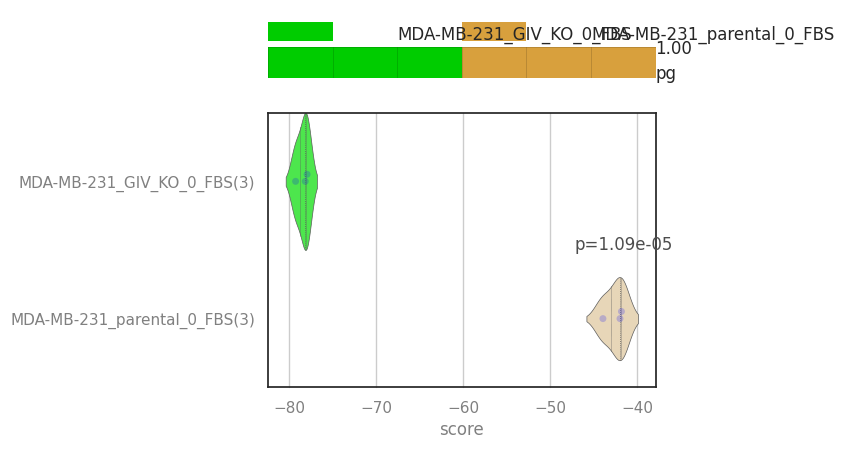

In [23]:
import bone
reload(bone)
cfile = "/Users/sinha7290/public_html/BoNE/gprint_final/normal_stemm_cell.pdf"
pdf = getPDF(cfile)
ana = MacAnalysis()
#cfile = 'iron_reg_sig.txt'
#wt1, l1 = [1], [['CCDC88A']]
#wt1, l1 = bone.getSViP()
#cfile = 'gprint_up_dn.txt'
#l1 = bone.getEntries(cfile, 0)
#wt1, l1 = [1, -1], [l1[1:4], l1[6:]]

#wt1, l1 = [1], [bone.getEntries("mamaprint.txt", 0)]

#wt1, l1 = [1], [['KI67', 'STK15', 'SURVIVIN', 'CCNB1', 'MYBL2', 'MMP11', 'CTSL2', 'GRB2', 'HER2', 'ER', 'PGR', 'BCL2', 'SCUBE2', 'CD68', 'BAG1', 'GSTM1', 'ACTB', 'GAPDH', 'RPLPO', 'GUS', 'TFRC']]
#OncotypeDX

#wt1, l1 = [1], [['ADGRL4','CCN4','CDKN2A','COL11A1','COL1A2','CXCL5','EDIL3','GREM1','HAPLN1','LINC01436','LUM','MMP1','MMP3','MYL9','NRN1','PDGFRA','PLS3','POSTN','PTN','ROR1','SPARC','TCEAL9','TMEFF2']]
#co-culture_sig2

#wt1, l1 = [1], [['HOXB13' ,'IL17BR' ,'BUB1B' ,'CENPA' ,'NEK2' ,'RACGAP1' ,'RRM2']]
#BCI

#wt1, l1 = [1], [bone.getEntries("PAM50.txt", 0)]

#wt1, l1 = [1], [bone.getEntries("veridex2.txt", 0)]

#wt1, l1 = [1], [bone.getEntries("7gene_sig.txt", 0)]
#7 gene/34604089

#wt1, l1 = [1], [bone.getEntries("brCA stem cells.txt", 0)]

#wt1, l1 = [1], [bone.getEntries("BrCA_stemcell_32.txt", 0)]

#wt1, l1 = [1], [['PSMB9', 'CXCL13', 'NPR3', 'CDKN2C']]
#Stemness [PMID:33110086]


#cfile = 'BREAST_CANCER_PROGENITOR_sig.txt'
#l1 = bone.getEntries(cfile, 0)
#wt1, l1 = [1, -1], [l1[1:432], l1[434:]]

#cfile = 'CNCL.txt'
#l1 = bone.getEntries(cfile, 0)
#wt1, l1 = [1, -1], [l1[1:7], l1[10:]]

#wt1, l1 = [1], [['AURKB', 'BUB1', 'CENPA', 'KIF4A', 'KIFC1', 'NCAPG', 'PLK1', 'RAD54L']]
#8 gene sig

#wt1, l1 = [1], [bone.getEntries("mSigDB.txt", 0)]

#wt1, l1 = [1], [bone.getEntries("Miranda.txt", 0)]

#wt1, l1 = [1], [['LGR5']]


#cfile = 'ALDEFLUOR.txt'
#l1 = bone.getEntries(cfile, 0)
#wt1, l1 = [1, -1], [l1[1:28], l1[30:]]


#cfile = 'TCGAnalyze.txt'
#l1 = bone.getEntries(cfile, 0)
#wt1, l1 = [1, -1], [l1[1:601], l1[605:]]

#wt1, l1 =[1], [['KDM5B', 'CTNNB1', 'NOTCH1', 'HIF1A', 'TWIST1', 'NES', 'EZH2', 'EPAS1', 'BMI1', 'LGR5']]
#cancer stem cell

#wt1, l1 =[1], [['ZSCAN4', 'CD44', 'CD34', 'ABCG2', 'PROM1', 'ZFPR42', 'NANOG']]
#normal stem cell

#wt1, l1 =[1], [['KLF4', 'MYC', 'SOX2', 'POU5F1']]
#Yamanaka factor

#wt1, l1 =[1], [['LDHD']]

###############################################

#cfile = 'gprint_up_dn.txt'
#l1 = bone.getEntries(cfile, 0)
#wt1, l1 = [1, -3], [l1[1:4], l1[6:]]


cfile = 'log5p01.txt'
l1 = bone.getEntries(cfile, 0)
wt1, l1 = [-3, 1], [l1[2:7], l1[9:]]

#cfile = 'log4p01.txt'
#l1 = bone.getEntries(cfile, 0)
#wt1, l1 = [1, -1], [l1[1:13], l1[14:]]

#cfile = 'log3p01.txt'
#l1 = bone.getEntries(cfile, 0)
#wt1, l1 = [1, -1], [l1[1:48], l1[49:]]

#cfile = 'log3p001.txt'
#l1 = bone.getEntries(cfile, 0)
#wt1, l1 = [1, -1], [l1[1:49], l1[51:]]

#cfile = 'log2p01.txt'
#l1 = bone.getEntries(cfile, 0)
#wt1, l1 = [1, -1], [l1[1:166], l1[167:]]

#wt1, l1 = [1], [['GPR39' ,'GPR35' ,'LPAR5' ,'VIPR1' ,'PTGDR' ,'P2RY2']]

#wt1, l1 = [1], [['CCR5' ,'CCR1' ,'EDNRB' ,'PTAFR' ,'PTGFR' ,'EDNRA' ,'S1PR1' ,'F2R' ,'CALCRL' ,'FPR2' ,'GPR4']]
#wt1, l1 = [1], [['PGR' ,'SCGB2A1' ,'PIP' ,'MGP' ,'EFHD1' ,'SERPINA3' ,'WFDC2' ,'AGR2' ,'MUC16' ,'TMPRSS4' ,'FAT1' ,'FAT2' ,'SFRP1' ,'SFRP2' ,'CXCL13' ,'CXCL14' ,'PRAME']]

#ana.getPGhshm()
#ana.getPGhsall()
ana.getPGhs0()
#ana.getPGhsKO()
#ana.getPGhsWT()
#ana.getcelltype()
#ana.getArpaia()
#ana.getlang2()
#ana.getCreighton2009()
#ana.getshan2019()
#ana.getwang2()
#ana.getTiezzi()
#ana.getebright2020()
#ana.getSavage2020(2)
#ana.getaceto2013()
#ana.getboral3()
#ana.getebright3()
#ana.getAnderson2021()
#ana.getFu2019()
#ana.getXiao2020()
#ana.getCarey2010()
#ana.getHatzis_test()
#ana.getTsai2()
#ana.getCarey2()
#ana.getISPY1_248()
#ana.getDas2()

fig = processData(ana, l1, wt1, desc=None, violin=1)
pdf.savefig(transparent=True,bbox_inches = 'tight')
closePDF(pdf)

In [75]:
ana.orderData(l1,wt1)
ana.f_ranks
ana.getScores()

[0]


([[0], [0], [0], [0], [0]], [0, 0, 0, 0, 0])

In [62]:
[ana.h.headers[i] for i in ana.i1]

['GSM1012135', 'GSM1012137', 'GSM1012139', 'GSM1012141', 'GSM1012143']

In [45]:
ana.order = [i for i in ana.h.aRange()]
df = pd.DataFrame()
ana.orderData(l1, wt1)
df['MMP'] = [None, None] + list(ana.f_ranks)
df
thr = hu.getThrData(ana.f_ranks)
fthr = thr[0]
#fthr = 8.703688988121614
g1 = [i for i in ana.order if ana.f_ranks[i - ana.h.start] < fthr]
g2 = [i for i in ana.order if ana.f_ranks[i - ana.h.start] >= fthr]
for i in ana.order:
    if i in g1:
        print (ana.h.headers[i], 'LOW')
    else:
        print (ana.h.headers[i], 'Hi')
fthr

[1, 20]
GSM1012135 LOW
GSM1012136 Hi
GSM1012137 Hi
GSM1012138 Hi
GSM1012139 LOW
GSM1012140 LOW
GSM1012141 Hi
GSM1012142 Hi
GSM1012143 LOW
GSM1012144 Hi
GSM1012145 LOW
GSM1012146 Hi
GSM1012147 Hi
GSM1012148 Hi
GSM1012149 LOW
GSM1012150 Hi
GSM1012151 LOW
GSM1012152 LOW
GSM1012153 LOW
GSM1012154 LOW
GSM1012155 LOW
GSM1012156 Hi
GSM1012157 LOW
GSM1012158 LOW
GSM1012159 LOW
GSM1012160 LOW
GSM1012161 Hi
GSM1012162 Hi
GSM1012163 LOW
GSM1012164 LOW


2.298495213313212

In [18]:
ana.h.aRange()

range(2, 107)

Tsai 2021 (n = 42)
GSE128830 http://hegemon.ucsd.edu/Tools/explore.php?key=blood:leukemia&id=SS45
21 3 3 3 SS45
[1]


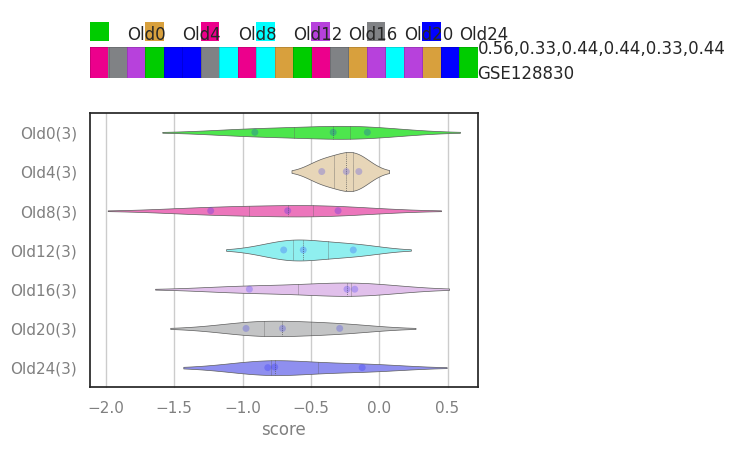

In [5]:
import bone
reload(bone)
ana = MacAnalysis()
#cfile = 'mamaprint.txt'
#cfile = 'iron_reg_sig.txt'
#wt1, l1 = [-1], [bone.getEntries(cfile, 0)]
#wt1, l1 = [1], [['ABCB7', 'NCOA4', 'SFXN1', 'SLC25A28', 'SLC48A1']]
#wt1, l1 = [1], [['MEMO1']]
wt1, l1 = [1], [['CCDC88A']]
#wt1, l1 = [1], [['CDH1']]

ana.getTsai2()
fig = processData(ana, l1, wt1, desc=None, violin=1)

PGhs (n = 18)
pg http://hegemon.ucsd.edu/Tools/explore.php?key=blood:leukemia&id=SS29
12 3 3 3 SS29
[23]


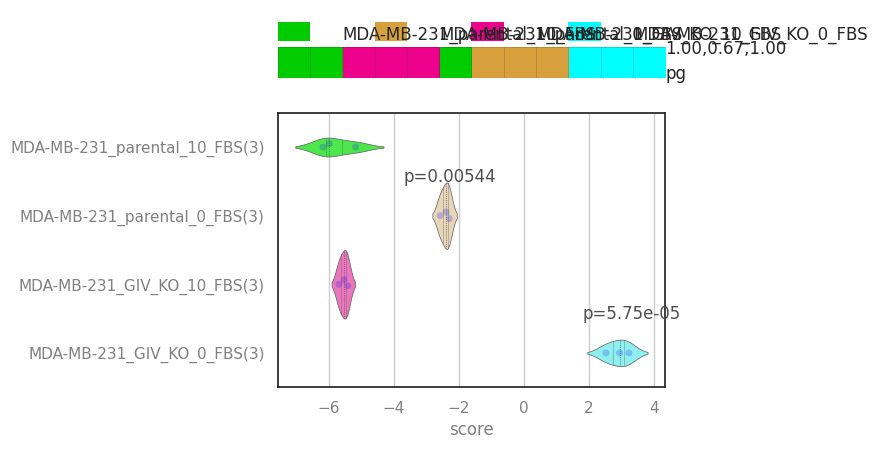

In [14]:
import bone
reload(bone)
ana = MacAnalysis()
#cfile = 'mamaprint.txt'
#cfile = 'iron_reg_sig.txt'
#wt1, l1 = [1], [bone.getEntries(cfile, 0)]
#wt1, l1 = [1], [['CYBRD1', 'STEAP1', 'STEAP2', 'HFE', 'SCARA5', 'LTF', 'TFRC', 'SLC40A1', 'ISCU', 'SFXN1', 'EPAS1', 'SLC25A37', 'ABCG2', 'SFXN5', 'HIF1AN', 'ALAD']]

#wt1, l1 = [1], [['ABCB7', 'NCOA4', 'SFXN1', 'SLC25A28', 'SLC48A1','SCARA5','CYBRD1','ISCU']]

#cfile = 'gprint_up_dn.txt'
#l1 = bone.getEntries(cfile, 0)
#wt1, l1 = [1, -1], [l1[1:4], l1[6:]]

#wt1, l1 = [1], [['ILK']]

wt1, l1 = [1], [bone.getEntries("yap_22.txt", 0)]

#wt1, l1 = [1], [['HMGN1P3', 'MMP3', 'SNORD3A', 'TOX3']]
#wt1, l1 = [-1], [['C5AR2', 'CCDC187', 'CTAGE7P', 'DES', 'EGF', 'FBP1', 'FGFBP1', 'FXYD3', 'GJA9-MYCBP', 'HLA-DOB', 'ISLR', 'KIAA1211L', 'KIF5A', 'LDHD', 'LPAR5', 'LY6D', 'MAP1A', 'MEOX1', 'MIR222HG', 'MIR34AHG', 'NFE2', 'ODF3L1', 'PLA2G3', 'PLCXD3', 'PPFIA4', 'PRKCB', 'SEMG1', 'SLC12A3', 'TENT5B', 'TNFSF14', 'ZSWIM3']]

ana.getPGhsall()
#ana.getLuker3()
fig = processData(ana, l1, wt1, desc=None, violin=1)

PGhs (n = 18)
pg http://hegemon.ucsd.edu/Tools/explore.php?key=blood:leukemia&id=SS29
6 3 3 0 SS29
[8]


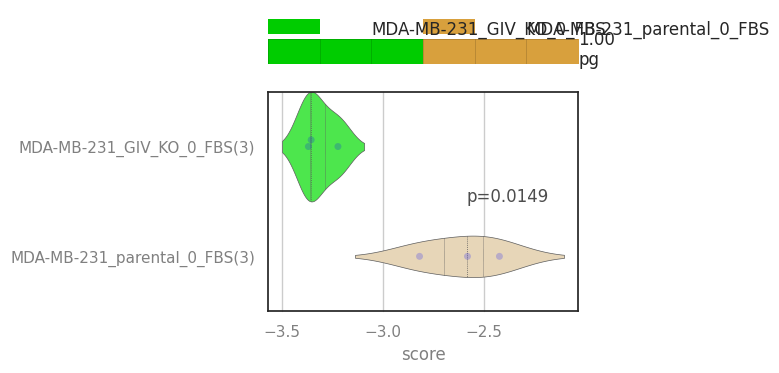

In [9]:
import bone
reload(bone)
ana = MacAnalysis()
#cfile = 'mamaprint.txt'
#cfile = 'iron_reg_sig.txt'
#wt1, l1 = [-1], [bone.getEntries(cfile, 0)]
#wt1, l1 = [1], [['ADAM8', 'ATOX1', 'CCNY', 'CDH13', 'CINP', 'COL13A1', 'CPT1A', 'DNPEP', 'ESRRA', 'EXT1', 'FIBP', 'GPC6', 'HSPBP1', 'MRGPRX3', 'NXPH4', 'PDGFB', 'PPP1R14C', 'SARS2', 'SRD5A1', 'WDR74']]
#wt1, l1 = [1], [['GJA1']]
#wt1, l1 = [1], [['FXYD3']]


#cfile = 'gprint_up_dn.txt'
#l1 = bone.getEntries(cfile, 0)
#wt1, l1 = [-1, 1], [l1[1:4], l1[6:]]

#cfile = 'girdinprint.txt'
#l1 = bone.getEntries(cfile, 0)
#wt1, l1 = [-4], [l1[1:]]

#cfile = 'ALDEFLUOR.txt'
#l1 = bone.getEntries(cfile, 0)
#wt1, l1 = [1, -1], [l1[1:28], l1[30:]]

#wt1, l1 = [1], [['PSMB9', 'CXCL13', 'NPR3', 'CDKN2C']]
wt1, l1 = [1], [['HLA-A']]

#wt1, l1 = [1], [['PSMB9', 'CXCL13', 'NPR3', 'CDKN2C']]

#wt1, l1 = [1],[[“CHST8","MAPT","OLFM1","PDZK1","RASGRP1","MPPED2","GREB1","MYB","GFRA1","PGR","ELOVL2","ADCY1","NPY1R","TFF1","ACOX2","SGK1","STC2","CALCR","KRT13","VCAN","COL3A1","CXCL12","GJA1","TGM2”]]
#wt1, l1 = [1],[['CHST8','MAPT','OLFM1','PDZK1','RASGRP1','MPPED2','GREB1','MYB','GFRA1','PGR','ELOVL2','ADCY1','NPY1R','TFF1','ACOX2','SGK1','STC2','CALCR','KRT13','VCAN','COL3A1','CXCL12','GJA1','TGM2']]

#wt1, l1 = [1], [bone.getEntries("TCGAnalyze.txt", 0)]
#wt1, l1 = [1], [['PSMB9', 'CXCL13', 'NPR3', 'CDKN2C']]

#cfile = 'CNCL.txt'
#l1 = bone.getEntries(cfile, 0)
#wt1, l1 = [1, -1], [l1[1:7], l1[10:]]


ana.getPGhs0()
fig = processData(ana, l1, wt1, desc=None, violin=1)

Ebright2 (n = 195)
GSE144495 http://hegemon.ucsd.edu/Tools/explore.php?key=blood:leukemia&id=TNB29
195 39 156 0 TNB29
[20, 1]


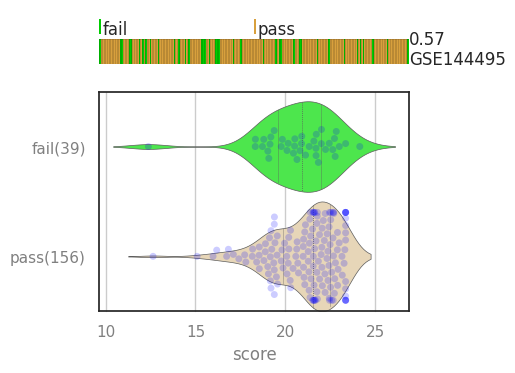

In [24]:
import bone
reload(bone)
cfile = "/Users/sinha7290/public_html/BoNE/GIV_CD_UC.pdf"
pdf = getPDF(cfile)
ana = MacAnalysis()
#cfile = 'iron_reg_sig.txt'
#wt1, l1 = [1], [['CCDC88A']]
#wt1, l1 = bone.getSViP()
#cfile = 'gprint_up_dn.txt'
#l1 = bone.getEntries(cfile, 0)
#wt1, l1 = [1, -1], [l1[1:4], l1[6:]]
#wt1, l1 = [1], [bone.getEntries("mamaprint.txt", 0)]
#wt1, l1 = [1], [['KI67', 'STK15', 'SURVIVIN', 'CCNB1', 'MYBL2', 'MMP11', 'CTSL2', 'GRB2', 'HER2', 'ER', 'PGR', 'BCL2', 'SCUBE2', 'CD68', 'BAG1', 'GSTM1', 'ACTB', 'GAPDH', 'RPLPO', 'GUS', 'TFRC']]

#wt1, l1 = [1], [['ADGRL4','CCN4','CDKN2A','COL11A1','COL1A2','CXCL5','EDIL3','GREM1','HAPLN1','LINC01436','LUM','MMP1','MMP3','MYL9','NRN1','PDGFRA','PLS3','POSTN','PTN','ROR1','SPARC','TCEAL9','TMEFF2']]
#co-culture_sig2

#cfile = 'gprint_up_dn.txt'
#l1 = bone.getEntries(cfile, 0)
#wt1, l1 = [1, -3], [l1[1:4], l1[6:]]

cfile = 'log5_p01.txt'
l1 = bone.getEntries(cfile, 0)
wt1, l1 = [-1, 1], [l1[1:43], l1[44:]]

#ana.getahn3()
#ana.getCreighton2009()
#ana.getshan2019()
#ana.getwang2()
#ana.getTiezzi()
#ana.getebright2020()
#ana.getSavage2020(2)
ana.getebright3()
fig = processData(ana, l1, wt1, desc=None, violin=1)
pdf.savefig(transparent=True,bbox_inches = 'tight')
closePDF(pdf)

Hatzis 2011 breast (n = 508)
GSE25066 http://hegemon.ucsd.edu/Tools/explore.php?key=blood:leukemia&id=BC8
319 44 160 78 BC8
[21, 3]


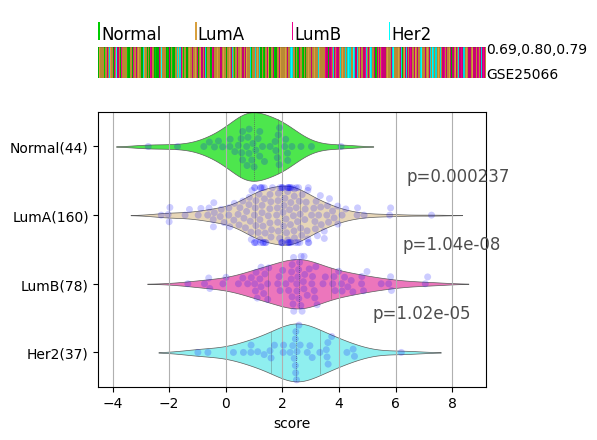

In [5]:
import bone
reload(bone)
cfile = "/Users/sinha7290/public_html/BoNE/lum.pdf"
pdf = getPDF(cfile)
ana = MacAnalysis()
#cfile = 'iron_reg_sig.txt'
#wt1, l1 = [1], [['CCDC88A']]
#wt1, l1 = bone.getSViP()
#cfile = 'gprint_up_dn.txt'
#l1 = bone.getEntries(cfile, 0)
#wt1, l1 = [1, -1], [l1[1:4], l1[6:]]
#wt1, l1 = [1], [bone.getEntries("mamaprint.txt", 0)]
#wt1, l1 = [1], [['KI67', 'STK15', 'SURVIVIN', 'CCNB1', 'MYBL2', 'MMP11', 'CTSL2', 'GRB2', 'HER2', 'ER', 'PGR', 'BCL2', 'SCUBE2', 'CD68', 'BAG1', 'GSTM1', 'ACTB', 'GAPDH', 'RPLPO', 'GUS', 'TFRC']]

#wt1, l1 = [1], [['ADGRL4','CCN4','CDKN2A','COL11A1','COL1A2','CXCL5','EDIL3','GREM1','HAPLN1','LINC01436','LUM','MMP1','MMP3','MYL9','NRN1','PDGFRA','PLS3','POSTN','PTN','ROR1','SPARC','TCEAL9','TMEFF2']]
#co-culture_sig2

#cfile = 'gprint_up_dn.txt'
#l1 = bone.getEntries(cfile, 0)
#wt1, l1 = [0, -3], [l1[1:4], l1[6:]]

cfile = 'log5p01.txt'
l1 = bone.getEntries(cfile, 0)
wt1, l1 = [-1, 1], [l1[1:43], l1[44:]]

#wt1, l1 = [1], [['AC003092.1','MMP1', 'SERPINB2', 'SERPINE2', 'MMP3', 'POSTN']]


ana.getHatzis2()
#ana.getCreighton2009()
#ana.getshan2019()
#ana.getwang2()
#ana.getTiezzi()
#ana.getebright2020()
#ana.getSavage2020(2)
#ana.getaceto2013()
fig = processData(ana, l1, wt1, desc=None, violin=1)
pdf.savefig(transparent=True,bbox_inches = 'tight')
closePDF(pdf)

Aceto 2013 (n = 29)
GSE51827 http://hegemon.ucsd.edu/Tools/explore.php?key=blood:leukemia&id=TNB9
29 14 15 0 TNB9
[0]


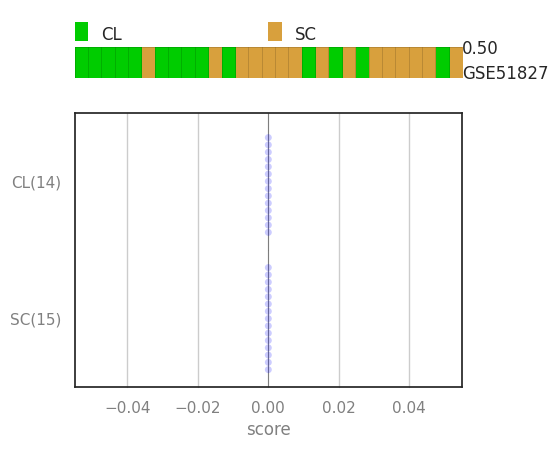

In [5]:
import bone
reload(bone)
cfile = "/Users/sinha7290/public_html/BoNE/GIV_CD_UC.pdf"
pdf = getPDF(cfile)
ana = MacAnalysis()
#cfile = 'iron_reg_sig.txt'
#wt1, l1 = [1], [['CCDC88A']]
#wt1, l1 = bone.getSViP()
#cfile = 'gprint_up_dn.txt'
#l1 = bone.getEntries(cfile, 0)
#wt1, l1 = [1, -1], [l1[1:4], l1[6:]]
#wt1, l1 = [1], [bone.getEntries("mamaprint.txt", 0)]
#wt1, l1 = [1], [['KI67', 'STK15', 'SURVIVIN', 'CCNB1', 'MYBL2', 'MMP11', 'CTSL2', 'GRB2', 'HER2', 'ER', 'PGR', 'BCL2', 'SCUBE2', 'CD68', 'BAG1', 'GSTM1', 'ACTB', 'GAPDH', 'RPLPO', 'GUS', 'TFRC']]

#wt1, l1 = [1], [['ADGRL4','CCN4','CDKN2A','COL11A1','COL1A2','CXCL5','EDIL3','GREM1','HAPLN1','LINC01436','LUM','MMP1','MMP3','MYL9','NRN1','PDGFRA','PLS3','POSTN','PTN','ROR1','SPARC','TCEAL9','TMEFF2']]
#co-culture_sig2

#cfile = 'gprint_up_dn.txt'
#l1 = bone.getEntries(cfile, 0)
#wt1, l1 = [0, -3], [l1[1:4], l1[6:]]

cfile = 'log5p01.txt'
l1 = bone.getEntries(cfile, 0)
wt1, l1 = [1, -1], [l1[2:7], l1[9:]]

#cfile = 'log4p01.txt'
#l1 = bone.getEntries(cfile, 0)
#wt1, l1 = [1, -1], [l1[1:13], l1[14:]]

#cfile = 'log3p01.txt'
#l1 = bone.getEntries(cfile, 0)
#wt1, l1 = [1, -1], [l1[1:48], l1[49:]]

#cfile = 'log2p01.txt'
#l1 = bone.getEntries(cfile, 0)
#wt1, l1 = [1, -1], [l1[1:166], l1[167:]]

#wt1, l1 = [1], [['AC003092.1','MMP1', 'SERPINB2', 'SERPINE2', 'MMP3', 'POSTN']]
wt1, l1 = [1], [['GJA9']]

#ana.getCarey2()
#ana.getcelltype()
#ana.getCreighton2009()
#ana.getshan2019()
#ana.getwang2()
#ana.getTiezzi()
#ana.getebright2020()
#ana.getSavage2020(2)
ana.getaceto2013()
fig = processData(ana, l1, wt1, desc=None, violin=1)
pdf.savefig(transparent=True,bbox_inches = 'tight')
closePDF(pdf)

Arpaia 2012 (n = 16)
GSE37340 http://hegemon.ucsd.edu/Tools/explore.php?key=blood:leukemia&id=TNB24
8 4 4 0 TNB24
[59]


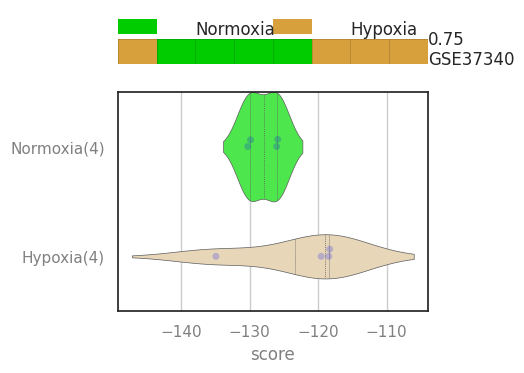

In [11]:
import bone
reload(bone)
cfile = "/Users/sinha7290/public_html/BoNE/test.pdf"
pdf = getPDF(cfile)
ana = MacAnalysis()
#cfile = 'iron_reg_sig.txt'
#wt1, l1 = [1], [['CCDC88A']]
#wt1, l1 = bone.getSViP()
#cfile = 'gprint_up_dn.txt'
#l1 = bone.getEntries(cfile, 0)
#wt1, l1 = [1, -1], [l1[1:4], l1[6:]]
#wt1, l1 = [1], [bone.getEntries("mamaprint.txt", 0)]
#wt1, l1 = [1], [['KI67', 'STK15', 'SURVIVIN', 'CCNB1', 'MYBL2', 'MMP11', 'CTSL2', 'GRB2', 'HER2', 'ER', 'PGR', 'BCL2', 'SCUBE2', 'CD68', 'BAG1', 'GSTM1', 'ACTB', 'GAPDH', 'RPLPO', 'GUS', 'TFRC']]

#wt1, l1 = [1], [['ADGRL4','CCN4','CDKN2A','COL11A1','COL1A2','CXCL5','EDIL3','GREM1','HAPLN1','LINC01436','LUM','MMP1','MMP3','MYL9','NRN1','PDGFRA','PLS3','POSTN','PTN','ROR1','SPARC','TCEAL9','TMEFF2']]
#co-culture_sig2

#cfile = 'gprint_up_dn.txt'
#l1 = bone.getEntries(cfile, 0)
#wt1, l1 = [1, -3], [l1[1:4], l1[6:]]
#wt1, l1 = [1], [['AADACL1']]

#cfile = 'log5_p01.txt'
#l1 = bone.getEntries(cfile, 0)
#wt1, l1 = [-1, 1], [l1[1:43], l1[44:]]

#wt1, l1 = [1], [['PGR' ,'SCGB2A1' ,'PIP' ,'MGP' ,'EFHD1' ,'SERPINA3' ,'WFDC2' ,'AGR2' ,'MUC16' ,'TMPRSS4' ,'FAT1' ,'FAT2' ,'SFRP1' ,'SFRP2' ,'CXCL13' ,'CXCL14' ,'PRAME']]

#ana.getArpaia()
#ana.getInce2()
#ana.getCreighton2009()
#ana.getshan2019()
#ana.getwang2()
#ana.getTiezzi()
#ana.getebright2020()
#ana.getSavage2020(2)
ana.getaceto2013()
fig = processData(ana, l1, wt1, desc=None, violin=1)
pdf.savefig(transparent=True,bbox_inches = 'tight')
closePDF(pdf)

Carey 2010 (n = 36)
GSE23428 http://hegemon.ucsd.edu/Tools/explore.php?key=blood:leukemia&id=TNB22
8 4 4 0 TNB22
[38, 228]


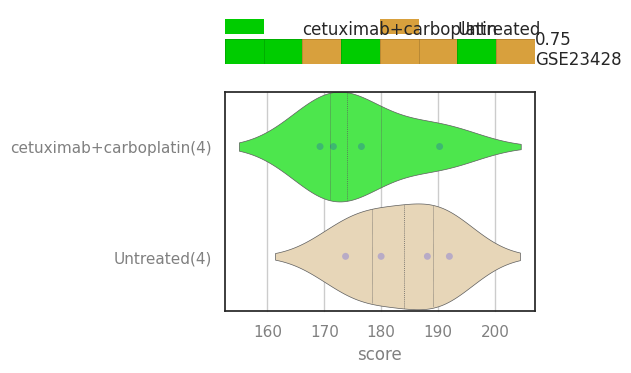

In [19]:
import bone
reload(bone)
cfile = "/Users/sinha7290/public_html/BoNE/test.pdf"
pdf = getPDF(cfile)
ana = MacAnalysis()
#cfile = 'iron_reg_sig.txt'
#wt1, l1 = [1], [['CCDC88A']]
#wt1, l1 = bone.getSViP()
#cfile = 'gprint_up_dn.txt'
#l1 = bone.getEntries(cfile, 0)
#wt1, l1 = [1, -1], [l1[1:4], l1[6:]]
#wt1, l1 = [1], [bone.getEntries("mamaprint.txt", 0)]
#wt1, l1 = [1], [['P2RY2']]

#wt1, l1 = [1], [['ADGRL4','CCN4','CDKN2A','COL11A1','COL1A2','CXCL5','EDIL3','GREM1','HAPLN1','LINC01436','LUM','MMP1','MMP3','MYL9','NRN1','PDGFRA','PLS3','POSTN','PTN','ROR1','SPARC','TCEAL9','TMEFF2']]
#co-culture_sig2

#cfile = 'log5_p01.txt'
#l1 = bone.getEntries(cfile, 0)
#wt1, l1 = [-1, 1], [l1[1:43], l1[44:]]

#cfile = 'log4p01.txt'
#l1 = bone.getEntries(cfile, 0)
#wt1, l1 = [1, -1], [l1[1:13], l1[14:]]

cfile = 'log3p01.txt'
l1 = bone.getEntries(cfile, 0)
wt1, l1 = [1, -1], [l1[1:48], l1[49:]]

#cfile = 'log2p01.txt'
#l1 = bone.getEntries(cfile, 0)
#wt1, l1 = [1, -1], [l1[1:166], l1[167:]]

ana.getCarey2()
#ana.getCreighton2009()
#ana.getshan2019()
#ana.getwang2()
#ana.getTiezzi()
#ana.getebright2020()
#ana.getSavage2020(2)
#ana.getaceto2013()
fig = processData(ana, l1, wt1, desc=None, violin=1)
pdf.savefig(transparent=True,bbox_inches = 'tight')
closePDF(pdf)